# Fake Bill Detection
Author: Morariu Tudor

## Citirea si Corectarea datelor

### Citirea Dataset-ului

In [10]:
import pandas as pd

data = pd.read_csv("fake_bills.csv", delimiter=';');

data.dropna(inplace=True);
# Eliminam Liniile care au NaN deoarece nu am momentan un placeholder si sunt 37 de linii.

display(data);

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


*   **Obs 1**: Dataset-ul contine $1500$ de linii a $7$ coloane.
*   **Obs 2**: Dataset-ul trebuie normalizat.

### Normalizarea Datelor

#### Trasformarea coloanei "is_genuine" in bool

In [11]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder();

data["is_genuine"] = enc.fit_transform(data["is_genuine"]);

#### Normalizarea coloanelor

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();

data = pd.DataFrame(scaler.fit_transform(data));

### Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=[0]);
labels = data[0];

train_f, test_f, train_l, test_l = train_test_split(features, labels, test_size=0.5);


### Plotare $2D$ folosind PCA

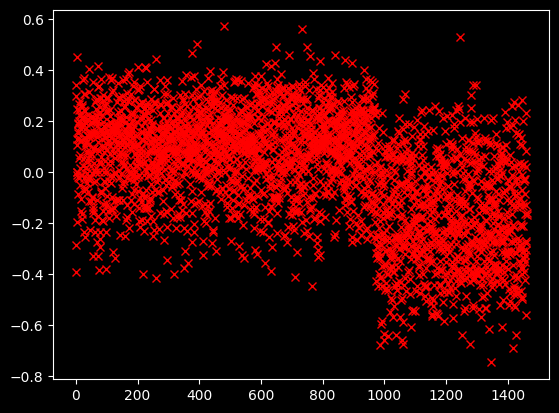

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('dark_background')

pca = PCA(n_components=2);

points = pca.fit_transform(features);

plt.plot(points, 'rx', );

*   **Obs**: Se observa doua clustere relativ bine definite.

## Alegera si Antrenarea modelului

*   Pentru model putem folosi un MLPClassifier deoarece este simplu si rapid de implementat.
*   Datele trebuie cluterizate in $2$ clustere, bancnote false sau adevarate.

In [15]:
from sklearn.neural_network import MLPClassifier
import numpy as np

model = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, alpha=1e-4, solver='adam', verbose=0, tol=1e-8, random_state=1, learning_rate_init=.01);

N_TRAIN_SAMPLES = train_f.shape[0]
N_EPOCHS = 100
N_BATCH = 10
N_CLASSES = np.unique(train_l)

scores_train = []
scores_test = []

train_f = train_f.values
train_l = train_l.values
test_f = test_f.values
test_l = test_l.values

epoch = 0
while epoch < N_EPOCHS:
    

    random_perm = np.random.permutation(train_f.shape[0])
    display(train_f)
    print(random_perm)
    mini_batch_index = 0
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        model.partial_fit(train_f[indices], train_l[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    scores_train.append(model.score(train_f, train_l))
    scores_test.append(model.score(test_f, test_l))

    print('Epoca:', epoch, " Scor Train:", model.score(train_f, train_l), "Scor Test:", model.score(test_f, test_l))

    epoch += 1


array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[342 213   7  16 564 437 308 172 296  23 451 636 223 720 680  34 460 405
 137 146 307  84 421 646 315 709 452  64 148 505 482 555 116  87 193 254
 713 428 718 540 270 722  78 601 120 507 360 591 483 551 510 727 190 181
 499 179 602 444 166  46 365 271 411 311 533 531 470  70 480 377 183 392
 216 527  57 145 547 442 140 320 523 710 512 163 658 565 366 463 253 567
  79 201 634 156  76 465 587 133 493 633 635 175 353   8 268 688 726   4
 199 525 703 398  86 198 132 372  44 123 708  14 208 359 562  56 719 189
  98 336 468 282 229 509 431 251 235 692 598  36 723  97 554 406 202 661
 517 589 590 258 495 630 640 285 364 445 328 100  27 232 622 571 443  41
 302 595 347 126  91 617 526 475 637 165  73 274 131 301 177 369  18 325
 401 370  19 503 426 570 399 278 438 618 478 326 501 169 263 545  60 542
 408 578 113 109 395  45 205  30 657 689 616 671 639 585 322 530 265  54
   5 605 464 150  95 252 440 117   6 603 261 292   0 706  82 240 672 122
 259 176 318 130 474  66 206 594 487 355 283  55  5

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 78 353  30 680 445 565 663 456 337 633  15 628 387 533  65 430 482  46
 228 521 407 618 647 183 713 520 460 127 564 529 605 569 190 643  13 113
 528 532 494 342 447 582 718 266 338 335 672 382 310 275  18 681 174  67
 219 670  20 192 592 581 603  26  91 710 404 522 466 347 256  35  82 265
 432  45 304 365 216 544 519 446  61  58 111 636 197 308 234 325 471 383
 398 349 191 716 625 369  86 554 151 608 700 189  32 452 217   1 301 159
 402 635 392 444 248 375 237   9 701  73 511 133 631 224 566 487 542  40
 371 196 577 662 222 147 437 386 536 517 381 370 574 591 134 449 485 178
 462 606 247 604 535 709  64 469 168 268 207 453 391 455  21 464 730 167
 323 100 601  24 708 188 423 692  49 486 434 429 250 585 163 380 367  76
  57 510 421 480   7 274 623 137 377 612 728 512 374  92 389 483 589 559
 332 412 317 470 527 394 278 246 551  25 108 385 695 206 613 356 637 294
 720 492 676 363 504 171 238 260  83  75 454 153 267 395 518 400 555 230
  52  36 226 116 245  69 344 724 661 408 132 261 25

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[193 281 417 355 698 682 183 448 238 514 489  99 294 693 284 530  26 688
 667 363 115 172 135 295 492 724 447  64 332 506 498  73 269 327 282 271
 356 217 350 348 424 628 167 691  96 519 318 679 696 237 624 305 587 244
 307 567 660 173 552 719 709 341 658 379 329 718 433 100 678 555 197  44
  30 368 230 545  66  87 686 617 414 226  32 133 285 147  97 423 317 140
 343 729 564 515 537 124 353 176 198 195 187  19 669  38 385  40 143 541
 239 687 251  41 494 725 621 477 118 542 170 627 397 713 712 125 117 123
  94 320   5 209 632 484 543  58 439  55 639 635 262 409 479  12 150  57
 500 292  46 708 481 578  53 376  48 459 152 298 286   7 190 625 178  84
 328 265 531 556 730  68  90 631 649 236 608 389 672 488 654 637 188 177
 151 720 134 618 455 276 695 711 111 141 454  13 290 250 243 661 365 322
 548 496 590 256  20 518 612 342  17 486 175 208  18 638 722 419 524 451
 413 581 314 372 180 471 463 246 726   6  27 690 574 337   3 401 647 580
 391 245 532 561 390 325 103 303 699 476   8 458 51

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[452 622 665 294 532 194 195 339  54 337 661 476 567  38 517 519  18 170
 150  15 444 159 220 466 256 494 175 397 345 249 680 569 344 188 306 586
 270 266   2 396 511 701  88 652 670  53 611 126 246 719 254 648 395 356
 286 124  33 461 121 562 193 574 241 406 327 430 144 101  79 441 374 499
 267 184 597 145 313 656 166 460 527 179 453  70 410 497 412 564 290 420
 429 505  64 311 227 638 216 531  14 326 552 162 553 516 119 583 690 243
 185 221 674 160 480 147 488 385 415 242 120 507  50   1 312   4 288 416
 128 171 198 657  56 580  27 251 161 729 627 482 560 539 411 711 189 173
 628 381 576 295 158 474 470 127 478  23 261 678 259 255 631  57 671  47
  19  40 587  90 575 528 269 177 523 663 331 122 390  22 515 277 387 130
 685 616 235 455 363 681 658 354  77 660 201 655 358 525 704 376 700 717
 456 404   9 705 556  91 426 548 240 708 730 653 225   0 213 292 318 398
 222 383 643 181 624  89 582 364  67 534 720 360 262 169  32 581 487 433
 578 481   6 417 212 492 715 384  63 421 215 343 52

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 13 698 650 229 115 530 225 323 490 580 176 379 250 367 677 244 248 590
 729 597 167 140 623 148 673 208  46 197 126 506 150  28 718 658 591 221
  71 330 661 109  31 436 640 132 441 345 479 656 637 438   1 285 571 321
  17   2 105 215 502 605 207 220 501 239 416 268 281 618 247 149 696 341
 705 343 317 146 612 135 329  76 557 398 283 216 484 456 643 255 190 427
 178   8 313 537 470 717 181 185 322 217 373 282 387 100   4 577 617 290
 262  58 296 649 507 170 187 521 195 681 155 453 369 584 582 309 192 246
 440  56 682 678 401  38 307 287 241 576 253 651 648 194 686 331 606 293
 274 660 304 399 493 147 564  75  53  21 177 531  54 668 608 226 183 542
 425 481 720 654 545 558 730 471 710 136 638 595 604 487 566 539 118 503
 461 360 169  62 641 547 664 347 602 364 361 228 631 552 633 133 410  63
 598 389 327 672 708 138 700 540 722 368 406 630 435 561 464  77 396 472
 443 199 449 258  24 726 587 430 117 499 480 186 524 165  72   7 260 394
 707 688 172  98 512 278 376 279 119  66  84 510 51

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[210 154  32 364 570 407 709 495 463 477 696 189 324 554 395 251 173 328
 452 538 237 675 530 218 482 128 359  21 679 366 156 493 566  39 321 209
 703 212 330 587 197 649 348  63 515 459 174 494 532 381 723 690 169 102
 217 329 387 630 229 263 492 678 681 277 139  11 369  34 467 236 100 410
 164 343 559  78 711 375 138 175 565 465 591 633 402 726 514 666  93 488
  95  60  24 503 698 474 153 664 435 393 279   3 727 404 316 272  42 448
 160 240  65 342 632  28 315 327 551 313 196 362 396 659 161 483 252 361
 468 303 464  99 643 136 536 611  67 346 227 462 695 133 646 490 687 290
 105  17 351 338 149 708  76 213 541  81  70 491  45 677 269 608 683 575
  35 446 123  31 672 223 146 408 144  18 403 215  94 430 211 433 347 621
 603 431 545 425 417 198 441 111 700 377 714 584 713 427 214 557 582  40
 383 469 438 715 524 283 170  72 104 473  49 282 583  77 306 701 688 140
 537 440 601  15 228 243 588 293 525 586 373 497 358 208 476 135 257 204
   1 609 379 475 680 234 244 168 599 288 253 479 10

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[400 667 695  63 101 108  31 679 293 233 130 297 131 693 653 122 564  80
 652 491 536  67  45 420 381   1 161 426 194 723  93 498 668 271 359  86
 714 331 432 577 704 120 628  75 409 558 170 492 715 212 616 364 273 165
  89 236 175 314 692 253 124  44 665 160 414 709 593 727 251 479  99 415
 418 522 589 559 567 452  48 171 607 696 545 258  59 728 542  49 337  62
 612 210 404 525 546 537 307 157 385 365 301 454 388 370 489 433 543 346
 603 274 550 632 617 220 621 656 163  88 609 290 313  35 645 700  16 167
  34 710 462 376 713 635 502  33 486 151 554 312 548 338  94 311 541 189
  55  26 289 711  57  47 395 200 470 430 720 353 495 257 604 439 427 134
  21 431 152 657 198 675 539   9 276  60 283 698 203 509 116  18 677 121
 126 323 361 382 109 368 262 206 375 497 391 230 423 694 725 102 531  56
 622 254 453 569 644 624 469 508 115 425 226 267 620 205 461 576   7 440
  14 481 308 482   6 330 523 144 342 272 664 232 260 259 146  73 527 456
  53 650 201 552 213 516 654 123 676 701 270 438 46

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[543 335 557 472 679 147 687 395 228 272 534 470 528 537 709 115 459 583
 132 513 677 363 367 631 697 692 531 195  58 346 263 613  24 347 407 585
 238 620 634 326 643  39 355 380 443 210 205 694 173 373 328 360 657 247
  51  67   0  41 595 511 200 135 644 281 627 726 259 100 304 350 701 158
 447 143 566 417 231 536 123  64  29 684 441 639 318 129 232 623 540  36
 580 434  42 591 475 463  46 107 108 334 316 237 341 369 109 688 217 112
 500 387 183 351  82 154 258 305 332 234 428 448 550 630 204 321 366 111
 588   2 469 525 445 340 221 561  31  93 647 359 344 203 512   4 612 468
 299 372 660 413 216 116 411 177 724 398 501 473 248 223 674  55 277 174
  47 682 672 397 151 594  68 680 658  40 590 611 150 603 329 130 179  95
 606 466 483 176 548 492 327 519 386 126 458 474 339 617 728 626 518 686
  90 429 582  83 702 433 104 267 499 479 538 250 493 175 435 629  66  74
 331 507  26 264 708  54 253 257 508 522 532 584 729 131 690 194 162 530
 485 193 482 396 581 180 227 464 370 320 494 362 50

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[122 144 199  30 699 396 674  79   0 461  19 482 375 560  67 167 528 696
 353 370  39 412 499 684 287 201 250 451 360 138  35  87 577 657 484 337
 125 434 344  48 695 501 615 109  69 676 358 621 552 725 388 729 471 454
 691 568 139 251 408 357 642 284 421 342 156 158 540 470 348  45 411 236
 362  13 476 481 433 688 373 426 683 671 367 485 723 182 119 418 352 643
 717 153 165 478 232 347 639 371 305 249 564 480 672 288 151 364 609 114
 383   6 268 629 160 556 507 205 374 365 366 128 622 553 339 341 133  62
 215 623 316 345 514 446 546  51 612 271 512 147 198  38 601 593 381 247
 617 613 310 730 416 332 359  64  22 678 534 399 283 405 384  71 168 650
 349  41 445 376 502 511 164 197 253 318  55 214  78 145 140 687 604 572
   9  11 670  81 624 206 680 720 372 209 694 649 685  97 456  33 527 632
 588 117 335  23 393 386 627 496 226 626 112 526 724 673 308 187 389 645
  42  85 184 202 439 172  99 224 429 545 275 726 582 244 180  12 630  49
 217 432 698 719 590 264 597 508  18 634 600 495 58

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 24  30  33 423 487 606 282 508 202 535 332 310 153 525 305 331  59 130
 615   2 719 578 457 691 297 479 468 679 108 371  26 212 622 221 320 594
 627 379 152 467 197 196 206 728 411 664 270 307 708 632 163 265 522 413
 659 100 513 224 264 712  13 357 324 657 128 220 120  55 471 136 688 608
 274 404 200 337 138 721 207 689 359 103  86 166 559 633 242 312 521 190
 666 414  17 225 669 173 546 439  88 191 377 203 400 328 554  39 397 309
 335 340 226 444 311 288 460 372  31 129 449 269 492 651 450 376 352 540
  37 368 347 496 223 539 405 247 569 464 260 677 563 323 418  10  47  22
 473 551 581 396  15 455 609 661 121  36 420 650  91 505 476  98 697 636
 156 216 587 429 421 550 378 695 640  76 276 625  29 211 425 326 409 588
 105 693 481   4 671 304 702 210 232 603 458 576  40 283  19 544  34 279
 104 394 723 119 541 676 344 574 355 510  61 292 385  12 278 586 109 618
 291 701 707  21 245 214 336 549 630  16 538 366 164 256 480  52 217 227
 722  97 316 715  44 313 644 628 485 456  82 365 35

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[176 350 247 106  19 523 496 356 307 375 395 299 337 477 528 112 444 293
 625  10  31 490 406 139 549 623  74 172  81 472 140 694 678 481 556  42
 365 257 110 319 675 169 551 454 339 305 715 175 378  95 723  84 518 346
 665 126 204 189  93 466 101 202 689 613 373 132 449 500 336 379  70 221
 668 650  58 726 519 521  79  72 631 710 341 502 117 451  97 639 429 522
 702 719 288 469 659  59 387  24 245 104  94   6 686 258 334 213 680 597
  12 705 431 514 412 291 243  86 438 278 593 524 709 499 632 246 421 148
 611 560 452 171 441 418 445 617 323 532 153 170 728 353 357 401 512 673
 262  44 590  16 283 660 270 195 666 600 125 317 366 234 520 232 314 501
 430 690  77 658 409 168  73 408 208 274 193  33 688 141 693 708 641  83
  63 263 614 111  64 720 491 160 615 352  80 123 329 697 674 653 695 468
 256  21  53 382 703 164 209 649 118 706 216 473 198 626  15 447 231 327
 536 370 296 582  60 589 546 253 149 303 289 428 335 372 367 343 180 259
 422 333  76 612   2 157 456 564 722 294 344  35 56

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[369 673 460 346 517 543 334 285 266 433 498 506 344 281  56 108 525 390
 124 555 709  87 661 268 611 540  23 417 286 567 627 728 247  61 706  93
 212  62 217  19 409 200 619 179 142 618 672  28 364 232 462 697 274 725
 604 723 375  99 591 381 651 105 646 492 164 463 143 187 178 450 640 134
 658 280 632 132 583 248 289 549 204 241  83 347 376 168  52 325 235 397
  80 608 514  29 445 138 321 533 499 423 557 563  91 223 410 177 151 141
 599 566 112  40 319  14 261 251 307 539 237 297 160 370 250 107  32 669
 592  10 205 400 699 482 465 157 318 698 527 641 137  16 666 385 605 620
 500 404 246 188 529  67  76 421 380 383 155 486 197 154   0 520 194 119
  98 368 615 504 120 438 365  42 123 101 457  66 424 332  82  35   4 650
 665 126 329 210 578 721 121  27 436  79 340 609  60 135 488 238   1 659
 674 403  95 693 670 174 724  20 675 595 114 208 713 395 159 149 104 716
 536 652 545 257  57 345 467 252 581 199 387  85 366  15 244 710 437 668
 413 479 607 414  48   9 626 273 320 480 570 477 42

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[  8 420  59 591 469 364 726 450 289  98 598 195 209 714 353  83 710 722
 695 430 301 380 106 566 576 211 110 169 531   1 425 214 298 287 516 180
 191 443  60 657  42 445 421 690 688 637 694 556  66 557 370 644 111  86
 196 291  90 438 393 518 290 424 669 680 310 312 398 213 712 242 649 609
 258 286 352 355 340  46 705   2 299 411 204  52 101 129 197 717 189 203
 334 217 288 339 678   6 442  29 473 691 702  23 347 548 619 193 356 257
 122 453 178 296 158 342 117 221 323 177 488 294 660 593 302 123 406 588
 579 282  61 607  33 275 416 575 236 444 410 142 107 357 439 577 179 333
 584 490 103 636  79 190 467 449  94 571 147 360 520 484   7 569 458 725
 381 351 662 570 655 273 610 670 138 476 672 432 182 102 200 419 297 311
 716 533 459  13  27 549 539 303 581 309 160 237 239 668  43 359 240 112
  87 601 232 412 400 265 433 472 693 427 156 373  54 253 181 198 115 641
 224 166 278 376 582  89 674 627 489 626 521  28 320 590 207 228 317 475
 343 617 514 729 496 491 124 118 226 163  97 176 66

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[524 370 658  55 131  22 209 102 678 193 584 307 175 417  50 101 293 456
 612 575 661 297  91 578 363 705 320 639 180  28 690 727 336 167 460 311
 158  58 216 682 170 634 232  17 487 686 503 284 508 169 262 135 535 253
 541 436 455 428 655 493  12 119 716 329 448  40 275 394  38  88 545 434
   3 513 321 283 289 326 107 563 257 509 291 350 210 445 138 251 588 185
 522 439 492  56 269  33 653 443 188 122  63 699 279 635 450 637 422 650
 688 475 214  72  48 189 360 559  10 286 498 549 410 553 243 629 622 267
 126 361 547 318 134 245 514  14 344  25  59 494  89 703 467 572 391 250
 140 226 528 151 481 168 605 600  97 529 630  83 255 444 701 429 626 671
 665 713 466 567 585 111 599 598 236 722 218 594 643 310 388 656 642 351
 464  62 719  43  85 176 412 552  70 398 248 654   2 144 480 633 582 435
 223 592  80 324 381  16 178 203 421 404  32 587 539 258 525 714 220  92
  45 276 534  31  98 668 497  81 227 387 595 295 177 533 591 160 433 347
 182  79 561 277 486 207 390 631 462 715 490 264 13

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[368 482 704 548 327 685 141  58  84 386 560 325 721 302 687   4 178 614
 648 603 475 633  26 174 531 396 343 371 345 537 457 636 265 668 242 437
 587 172 331 255  62 336 238 610 127 618 180 219 117  18 585 358 133  24
  86  28 281 641 125 708 196  95 580 713 277 601 370  38 218 220 543  10
 472 204 414 546  91 151 539 564 284 666 321 394 209 725 154 588 356 369
 593 239 535 158 191 626 166 454 200 348 480  60  46 542 114 417 701 404
 329 121 476 405 132 509 624 269 697 185 598 559 383 262 491 397 695 678
 599 378 718 506 682 550 456   9 162 512  20 229 684 702 202 163 398 176
  29  42 554 515 449 292 486 451 305 415 295 283 322 653 270 501 553 605
  51 390 719 606  96 715 250 552 315 635 607 522 649 116 497 179 450 462
 620 332 578 226  41  55 627 279 644 424 566  31 201  14 148  37 105 379
 221 150 392 502 442 352 233 407 693  81 661 140 589 473 294 192  19 224
 362 505  77 688 712 300 659  94 439 215   1 705 604 724 293 426  12 222
 126 638 484  61 351 528 672 212 106  22 720 631 48

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 22 254 729 140 110 667 145 318 369  98  61 418 193  97 335 326  43  15
 121 702 167 205 305 372 147 371 306 697 527 480 486  86  89 349  95 500
 157 696 189 124 553 410 297 272 223 688 490 342 317 208 401 423  62 178
 675  52 328 730 552 293 689 252 449 616  47 446 162 431 722 620  33  66
  41 573 519 239 581  84 265 455 275 207 142  37 543 123 445 406 662 296
 636  28 350 155 268 182 709  54 584 148 319 331 582 231 661 420 315 478
 627 400 113 605 201 506 383 200   5 271 220 203  69 365 323 468 469  17
 284 690  70  77 483 217 202 537 597 515  58 441 642 198 608 494 321  74
 687 363 470 219  12 652 170 658 298 173 397 336 720 724 344 424 106 477
 184 301 236 114 476  51  10 322 587 161 174 598 197 591 228 226 466  91
 324 337 385 535 258 390 721 405 559 232 101   2 195 643  35 117 367 657
 635  64  48 243 256 542 555 282 538 270 518 666 188 172 594 473 664 137
 671 534 103 417 430 706  99 112 210 429 474 523 234 263 679 141  60 289
 127 641 152   0 100 283 593 651 425 550 558 412 46

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[506 450 188 304 214 676 582  89 407 133 542 287  84 603 349 649 536 724
 262  27  26 713 459  97 282   6  45 383  62 199 463 575 717   2 660  28
 578 216 528 498 468 307 127 522 126 487 491 476 678 419  46 652 260 158
 512 424  75 372 195 472 474  94 484 240 243 123 626 334  17 191  11 493
   3 120 526 297 105 707 452 570 186 355 596 507 238 306 460 480 505 500
 351 107  22  63 366 545 248 354 701 115 486  74 681 562 423 279 666 513
 551 244 421 283 194  73  96 174 682 223 553 688 288 504  47 253 544 521
  38  21 171 217  40 427 470 252 266 509 275 259  15  25 336  78 393 715
 193   1 295  41 273 131   5 674 323 408 342 625 405 143  44  58 376 215
  20 231 257 580 203 609 658  95 106 502 677 672 299  31 725  35 302 368
 699 635 402 157 251 265 411 162 613 531 166 296 101 245 590 285 599 511
 594 360 132   8 384 415 418 395 318 565 546 155 220 695 627 436  37 343
 332 371 685 614 641 482   0 490 438 563 337 510 560 397 441 426 566  12
  24 175 281  91 665 431 388 263  13 237 387 662 29

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[247 293 402  63 434  61 211 171 137 364 545 157 222  71  56  38 346 243
 272 531 621 177 102 644 297  60 542 380 521 289 478 391 164 112 388 704
 358  87 150 229 600 510 406 216 299 262 336 144 710 249  83  58 220 674
 665  33 185 476 477 290 196 356 399 329 147 343 698  20 675 534 638 413
 493 204 630  21 274 129 200 430 301 699 326 205 225 561 633 288 632 622
 327 323   4  14 206 571 585 447 307 651 244 591 172  97 170  10 488   9
 464 634 148  37 103 504 366 405 659  36   0 658  94 421  95 540  84 407
 501 610 233 160 508 652 128 234 432 640 463 424 270 228 382 442 183 683
 602 654 167  65 109 401 256 446  31  34 553 425 370 357 566 417 559 563
 154  25 117 337   3  78 395 316 433 328 352 426 594 201 525  51 457 284
 686  77 480 462 132 527 606 524 512 377 629 302 597 687 615  96 285   8
 483 539 635 227 475 275 312 161 618 179 461 614 169 108 669 684 269 437
 541 184 726 714 690 363 579 702 707 104 155  80 347 317 517 620 318 662
 136 724 306 572 522 513 332 118 607 730 217 554 56

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 92 379 480 266 687  31 175 718 415 283 591 345 265 712 590 166 114 449
 430 412 567  22 651 387 635 198 558 413 305 298  64 252 445 483 647 678
  10  49 373  39 704 637 261  66 290 442 434 393 615 401 416 568  58 295
 458  41 184 344  82 515 525 240 394 642 447 716 101 358 600 186  62 103
 180  99 508 519 557 549 173  46 106  95 355 217 276 104 357 421 429 146
 504 414 221 695 281  13 493 574  85 183 403 378 616 228 520 322 404 245
 324   6 589 206 398 472 225 205 677 545 171 356 423 107 307  16  28  65
 410 467 207 237 725 503 713 364 489 151 201 190 547  72 160 473 492 643
 575 663 700  11 523  48 331 351 268 512 710  45 466 371  86  25 448 570
 494 162 174 446 113 438 708 211 631 665 625 479 729  90 289 723 498 242
 629 333 521   0 707 311 585 328  47 477  55 490 279 326 441 400 578 181
  59 488  80 161 335 310 608 586 517 301 229 284 111 139 234  63 130 275
 248 250 436 542 141 705 658 154 254 459  20 197 692  98 571 554 312 634
  33 478 260 150  97 550 538 679 676 267 670 336  8

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[140 534  36 492 304 349 688 620  18 573 303 638 667 194 567  89 602 662
 348 244 629 287 137 336 491 524  73 622  75 372  81 494 316 618 646 412
 288  74 394  58  92 256 118 611 558  63 314 293 686 147 138 332 582 417
 661 517  39 550  85 191 432 623 443 224 713 362 613 590 670 312 527 447
 187 333 210 251 419 609 393   9 320 548 381 155 212 691 240 533 449 217
 265 669  55 465 398 460 311 108 302 728 223 250 553  97 363 479 242  64
 234 619 538 123 274 568 264 630 701 716 526 480 152 566 139  66 436 626
 204   4 631 206  93 470 239 516 496 730  32  33 434 595 510 116 666 399
 525 291 721 612 410 477 295 343 355 371 454 308 503 377 427 324 168 150
 310  96 322 165 241 305 475 706 604 720 605 707 699 664 606 600 690 633
 641 284 634 143 473 540 598 621 339 254  51 301 717 196 594 338 645 309
 561 198 298  62 530  72 392 722 607  60 177 299 498 614 252 100 345 326
 373 253 647  49 535 128 285 276   6 519 384 678 153 542 158 184 555 659
 207 532 438 226 442 502 597 719 389 529   8 271 11

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 53 372 625 298 437 237 607 320 100 558 596 688 177 618 435 373 224 121
  27 377  55 666 356 524 331 412 199  87 553  85 527 222 599 362 304 698
 305 408 200  14 405 497 379 282  36  28 556 518  56 655 548 272 528 504
 629 503 191 706 726 165 479  81 322 238  83 582 725 401 431 148 550 267
  38 360 108 221 670 124 593 280 565 367 489  92 704 279 406 281 488 212
 700 139  79 338 118 114 146 289 131 428 299 470 229 602 583 145 681 183
 219 541 155 549 270 253 186 466 133 520 651 123 274 308 473 192   1 348
 107 422 456 302 154  86 690 522 649 355 450 359 619 104 645 474 572 290
 420 609 129 539 418 654  64 630 566 724 623 523 201 632 101 150 350 689
 544  72 515 122 106 592 715  70  13 543 491 115 560 445  40 588 276  98
 494 675 341 314  39 366 385 591 482 702 507 676  51 243 671 334 105 112
 321 427 336 425 620 615 167  22 312 262 225 351 116  30 180 254 458 546
 545 430 278 381 433 309 184 517 423 391 209 285 234 471  67 176   6 608
 264 414 552 628 265 137  54 395 697 383 538  89  9

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[548 390  60  64 724  90 369 252 321 294 379 559 596 116 566 185 141 583
 389 239 201 647 569  26 258 169 595  15 493  45 558 717  85 376 621 354
 193  95 254 575 486 691 581 170 664 278 528 477 632 211 669 228  39 471
 607 561 609 699  48 298 435  54 215 268 643 371 127 110 308 574 707 176
 421 500 162 710 496  59 653 230 549 401 163 244   7 305 578 144  53 158
  34 190 584 314 573 726 385   0 703 714 324 238 306 565  37 113  89 600
 404 426 203 427 706 725 547 334 196   3 204  27  56 126 441 684 419 188
 624 179 356 256  83 236 187 469 338 326  36 398 143 284  35 212 696 405
 683 522 247  62 579 630 570 287 494 115 241 615 327 485 159  50 346 555
 137 217 195  44  32 475 654 198 545 237 202  82 625 331  19 694 646 467
 413 192 474 537 692 420 635 636 180 285 402 407 424 280 312 210 160 286
 642 117 483  97 310  42 362 620 515 124 227 550 288 525  33 728 391 552
 200 361 209 519 723  73 359 341 460 598 114  40  29 224 663 283 619 514
 323 511 614 601 358 263 351 571 510 367  58 103   

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[654 589 141 597 617 269 193 649 511 527 664   1  22 729 560 339 321 525
 423 671 501 564 191  42 569  38  90 628  28 122 445 166 201  93 558 552
 491 322 615 660 473 263 633 676 422  57 297 320 324 383  44 355 126 609
 598 364 163 505 691 461 490 494 152 256 557 604  62  78 238 701  26 718
 432 684 312 629 235 658 380 584 120 530 232 469 382 535 715 171 343 161
 605 387 706 246 529   2 650  65 436 639 288 195 534 593 341 390 600 594
  51  99 438  79  58 222 397 692   7 709 603 352 278 415 127  27  63 217
 319 720 167  11 108 394 515 205  17  41 143 595 476 418  49 571 332  64
 142 455 124 214 140 160 138   3 114 668 542 653 675  25 184 708  31 157
 508 607 398  33 335 623 512 384 396 637  36 554 437  10 327  23   5 250
 344 185 630 357 627 727 458 702 523 366 412 608 216 128 682  39 204 346
 509 270 199 144 710 190 657 257 400 348 325 244 292  77 695 497 154 578
 506 507 419 391 169 537 427 264 690  80 251  94 618 417 577 686 164 588
 553 404 475 513 539  37 159 479 662 713 176 699  4

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[633 511 421 637 649 241 489 394 234 346 530 468 264  84 319 276 550 571
 497 606 650 201 285 127 580  53  74 687 139 238 155 581 406 541 344  68
 568 342 240  55 475 133 330 356  66 194 623 180 259 613 191 525 104 415
 612 137 358 467   6 112 509 576  98 327 498 486 283 528 706 427 689 186
 485 275 420 681 270 466 374  35 207 355 575 480  29 592 657 363 676 248
  63 396 663 153 434 218 103 715 335 425 185 297 265 172 320  15 322 653
 565 105 677 450 131 179 203 517 495  54 228 443  36 170 199 310 709  33
 493 209  38 590 398 251 458 293 698 540 564  97 608  78 151 552 375  73
 524 144 641  45 334 210 227 369 367 672 594 708 260 419  82 249 446 187
 281 440 439 280 115 422 693 490 109 559 329 670 302  16 678 294 631 397
 232 642 447  58  24 448 390 323  72 600 190 315 587 539 624 245 463  56
 403 505 184 336 696 457 679 423 429 714 617 554 193 365 147 303 229 662
 286 444 146  19 488 307 459 582 262 435  89  57  67 176 561 413 339 507
 454 351 441 629 547 255 287 116 182 385 284  64 25

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[659 602 427  27 641  59 696 672 226 556  48 545 244 251  84 618 668  81
  10 542 414 185 255 713 318 645 288 697 520 117 240 434 148 612 140 221
 547 452 717 487 299 461 194 578 169   5 601 279 181 628  52 137  96 366
 123 295   2 208 531 231 356 502 152 507 247 442 186 375  86 135 643 238
 305 509 726 470 418 188 296 718 501 532 488 667 367  73  38 214 565 730
 189  62 493 376 702 362 572  91 441 686 131 259  40 203 426 312  70 504
  53 387 425 670 211 573 205 146 471 444 220  51 138 229 541 663  16 178
 195 106 307 455 549 149 204 151 235 340 586 258 331 436  24 345 321 215
   3 249 201 653  33 217  43  28 102 365 283 269 237  74 688 118 554 483
 566 166 720 109 564 604  57 268 474 405 236 177 377 607 633 398 248  36
 582 524 392  41 127 459 369 322 646  98 714 327 107 378 245 370 681 371
 431 273 386 108 141 228 289 629 440 172 128 344 642 727 513 640 648 277
 413 514 635 349 606   9 379 262 274 380 210 458 584 660 396 468 548 222
 358 478 711 355 571 310 419  94 690 576 399  60 39

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[375 212  53 466 499 239 698 605 621 373 313  45 549 478 414 613 567  43
 312 432 107 204 528 529 111 449 443 340 176 322 554 721 200 695 303 611
 356   0 135 404 181 479  12  22   6 624 298  70 556 471 434 191 132 366
  63 300 177 679 166  65 310  40 184 548 546  36 387 120 396  34 113 255
 473 641 156 296 564  30 676 345 452 138 615 518 490 444 700 271 682 190
 640 416 437  62  15 370 712 358 626 162 122 560 116 542 136 485 267 129
 686 707 343 606 579 381 260 268  58  57 186 592  78  71  93 342 384 584
 475 625  61 261 664 214 104 142 403 616 357  14 477 143 272 249 110 525
 446  59 139 553  46  10 315 469  66 360 105 152 198 550 126 658 711 498
 424 433 672 502 505 438 206 714  21 587 706 702 715 708 327 687 442 137
  91  51 535 607   1 365  87 643 730 692 680 175 705 187 215 106 629   8
 675 378 509  72 265 591 231 517 441 346 557 663 520 454 241 661 294 701
 597 555 408 234 652  90 390 673 614 248 281 648 566  96 349 355 341 236
 630 636 428 337 633 494 470 314 195 725 324 531 60

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[415 303 577 101 569 154  30 640 709 662 116 665 182 487 194  53 611 100
 424 490 534 444 714 173  82 352 230 292  18 316 412 620  74 299 432 717
 485 124 504 348 483 203 664 730   4 584 451 651 549 152 580 378  24 434
 413 472 681 572 468 257 565 276 282  63 686 290 496 561 673  90 149 421
 270 579 506 109 238 720 142 430  58 376 501 219 134 617   5 250 283 322
 166 632 705 305 201 525 654 546 280 206 607 370 558 121 112 711 397 308
 523  44 251 547 309 564  59 310 126 508 656 591 493 600 395 278 642 162
 716 279 274 596 353 212 272 517 158 359 486 105 536 489 439 509 147  87
 566 341 443 346 252 209 647 675  68   6 393  93   2 484 110  26  97 695
 372  37 551 469  50 186 426 277  95 592 653 288 135 628 297 364 228 522
 638  79 262 495 636 537 690 574 655 244 448 520 618 545 120 613 597 722
  72  25 700 293 214 114 544 699 264 560  55 178 641 261 463 205 312 170
 213 499 139 460  67 141   7 478 442  47 354 674 428 455 197  31 435 329
 542 518  36 441 263 260 327 552 258 296 402  64  6

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[537 248 470 130 330  12  17 671  11 525 674 394 666  61  46 659 552 566
 139  76 103 307 383 589 435 585 476 258 102   0   8 371 564 486 198 262
 619  22 322 314 197 178 244 527 114 586 335 410 729 140 215 516 584 605
 629 463 108 327 176 153 291 428 609 132 285 582 472 651  65 724 131 226
  98 225 105 429  14 645 709 598 501 264 457 249 419 608 336  60 663 536
 152  44 461 693 617 491 515 384  55 704 691 640 437 159 634 295 695 467
 535 712 385 436 308 711   7   9 591 631 686 331 649 239 730 630  26 425
 251  54 489 303 554 268 451 654 707 265 600 279 292 448 402 259 120 289
 250  92 195 228 519  63 665 571 473 255 507 332 353 237 380 447 517 418
 670  80 632 321 528 315 202 464 421 222  30 193  29 557 287  37 723 267
 667 328 135 604 438  75 182  27  21 399 603 549 692  43 570 174 532 100
 672 478 364 209 548 276 484 717 301 458 232 110 661 253 637 169 194 621
 283 184 565 111 342  74 529 390 121 626 423 396 577 343 269  36 638 137
 372  89 405 462 563 230 642 223 614 721 705 477 32

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[628 648 677  79 410 374 509 501 726 661 265 618 365 541  40 453 411 248
 574  23 376 582 528 239 377 230 101 619 179 172 580 228 423 124 116  29
  27 517  52 421 189 633 468 147 360 134 288 719 600 110 343 314  33 355
 524 664 482 183 559   4 224 106 563 400 565 605 564  94 729 464 187 399
 143 241 450  37  21 702 703 715 369  77 218 553 392 279 690 650 457 522
  51  20 436 722 433 188 138  24 346 379 174 431  58 728 225 326 318 471
 242 545 683 356 451 430 292 409 338 716 216 363 351  74 511 701 657 321
  30 659 285 473 281 669  76 458 435 687 523 140 354 652 366 185 333 121
 529 479 359 424 649  66  39  45  64 382 705 112 645 295 490 212 589 412
 128 535 420 556 193   3  75 160 150 579 208 439  91 480 272 290 539 720
  82  10 627 680   5  63 575 222 562 641 329 540 395 145 232 660 676 516
 328 446 415 546  83 502 238 105 273 114  46 120 170 135 375 573 316   6
 391 331 711 712 644 294 113 665 662 299 620  60 730 311 608 434 262 197
 694 255 707 416 688 148 367 244  84 606 305 186 56

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[147  64 272 512 239 234  41 379 494 504 336 392 148 469 356 620 641 124
 593 114 383 710 715 321 347 534 595 358 410 468 282 568 724 253 138 360
 159 575 472 456 475 539 184 218 635 221 556 451 621 322 487 580 502 526
 195 717 313 320 299 696 279 164  48 209 465 155 555  67 205 367 532   0
 661 505 370 562 137 623 596  13 730 571 578  98 252 402 669 537 117 541
 368 503 683 508 417 300 569 609 292 366 563  46 473 144 535 318 304 349
 722 382 130 278 363 608 202 289 416 594 307 372 729  19 277 681 199 231
 104 179 550 409 397 167 657 467 425 120 233 428 536 181 306 645 270 315
  77  83 651  38 422 212 658 249 559 393 449 290 479 626 310 146 406 496
 650  43 431 154 605 131 125 430 187 122 435 610  10 285 192  53 721 618
  66 519 716  50 654 583 538 374 271 694 171 631 604  40 215 165 337 348
 436 333 616 703 671 305 119 113 678 330 227  34 587 254 718 591  72 280
 161 400 530 243  35 388 338  51 582 175 676 662 506 489  95 412 136 719
   9 162 579 339 247 702 445 673  70 263  14 308 26

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[468 199 123 567  49 648 451 324 450 245 205 428  35  10 152 343 352 690
 531  98  15 562 618 200 186  95 579 273 599 376 298 519 241 148 481 625
 470 277 325 243 183 582 504 728 338 414 420  96  34 228 593 302  68  16
 467 397 182 724 261 581 684 398 455 363 191 386 341 255  14 588 230 162
 280 660  38 526 664 501  65 502 203 373 303 377 235 688 631 104 525 196
 309 304 602  76 710 522 193 370  87 429 592 563 721 411 654 368 620 619
 495 479  50 449 693 342 178 675 511 644 613 564  91 214 722 629 417 705
 652 101 163 353 105 537 195   4 369 609 634 260 250 355 524 190 668 565
 550  55 388 295 503 427 436  30 154 332  27 141 606 486  36 121 482 513
 520 614 321 274 677 116 528  56 254 315 624 357 224 577 222  58 326 616
  43 530 114 656 110 662 678 650 527 702 500 401 366 219 469 181 587 406
 552   8 497 610  69 584 129 207 399 671 410 443 161 108 713 645  75 149
 507  28 570 383 621 115 465 137 197 533 215 729 463 421 107 699 119 719
 327 632 440  94 249 394 117 706 492 379 603 571 36

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[253 463 164 661 282 687 248  61  60 589 608 146 560  78 588 534 144 241
 465 469 331 612 548  99 307   5 457 494 314 668  63 387 134 184 301  13
  94 244  71 449 263 143 564 372 729 416 386 321  57 311 678 274 636  18
 342 664  98 205 698 632 476 220 349 650  29 639 219 498 260 333 455  90
 503 561 306  20 445 151 212 113 312 656 271 697 376 425 464 680 451 527
 592 315 409 426 504 573 179 159 408 667  25 111 520 474 129 200 696 570
 153 204 433 466  81  52 563 712 371  10  54 524 725 462 223 286 537 472
 492 643 580 505 203 325 730 690 131 483 605 377 692  79 375 458 710 676
 666 443 600 477 211 327 188  38 581 625 419 364 489 468 110 135 346 193
 713 673 669 259 258 185 354 595  36 502 471  19 391 404 562 197 611 439
 709 201 177 265 160 128 441 452 526  40  11 221 544 236  64 644 233 726
 397  67  27 493 298  12 693 398  24 478 622 670   7 512  34 127 272 125
 390 473 174 242 655 679  69 641 247  47 245  62  14 442 438 191 194 288
 102 345 653 112 207 181 506  43  91 716 446 461 12

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[430 522 563 649 501 163 177 487 695  75 478 243  89 472 530 364 567 578
   3 664 331 685 444 375 330 626 185 190  64 160 307  97 301 274 721 458
 441 539 409 464 187 541 106  31  45 267 627 204  86 161  80 146 226  67
  40 295  55 492 170 268 148 650 607 284 195 107 590 191 506 684 521 239
 641 154 727 166 701 623  70 596 395 461 694  17 142 556  43  32 597 426
 303 155 315 415 424 559 245 218 140 511 159 447 550 494  15 543 169 376
 528  13  33 572 206 456 717 688 491 705  37 571 687 297 422 612 542 384
 304  96 533 236 201 420  62 606 246 674 396 617 256  51 335 448 479 485
 371 132 681 629 428 329 344 232 129 644 338 715 150 219 340  73 608  28
 179 569 380 593 227  88 262 703 352 480 253 105   8 363 575 341 103 552
 635 348 713 388 211 252 285 473 693 588 200 264 372 265 365 215 374 678
 210 100 334 640  65 719 378 421 577 655 493 711 435 125 707 353 123  26
 321  78  50 110 691 647 404 475 286 613 332 449 427 238 222 228 391 418
 188 135 261 117  83 520 355 208 168 467   7  99 63

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[445  36 447 481 373 321 251 273 100 590 417 327 285 575 556 534 546 584
  35 395 258 562 517 649 246 709 244 513 441 306 723 532 514 689   1 678
  82 636 365 665 570 664 111 495 174 164  66 522 235  98  70 516 197 515
 685  41 686 500 716 282 603 200 168 269 675 379 202 206 265 461 339 104
 301 186 325 135 730 641  19 706 411 468 182 537  75 553 599 313 208  74
 470 571 120 177 390 193  76 241 276 659 476 225  38 407 101 488 559 498
   9 199 263 640 145 446 259 154 388 122 458  11 315 643 483 719  44 226
 496 437 606  68 714 629 212  79 316 645  95 691 439 583 162 523 444 369
 303  37 128 342 406 505  86  71 279 608 346 155 601 524 383 565 413 621
 169 284 233 331 288 600 220 430 371 268 660 109 492 139 127 687 602  56
  84 436  57 605  48 466 668  91  16 190  12 520 700 361 314 433 540 229
 227 594 427 140 253 171 701  49 536 426 317 213 459 698 527 510 494 469
 538  65  29  50 654  27  26 274 159 663 457 554 401 597 726 479  93 650
 717 558 381 591 416 677 718 471 368 184 326 119 62

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[153 175 418 251 221 325 271 275  66  10 436  97 664 726   4 712 440 250
 527 409 167 413  86 475 378  58 705 192 456 607 596  73 142 676 209 417
 103 198 311 579 286 352 402  62 699 263 621 647 605 462 371 310 645 508
 333 482 603 601 651 174 533 390  94 640  69 514  64 235 358 228  35 595
  92 150 624  41 435  12  88 492 225 289 195 564  18 447 362 141 488 302
 490 130 496 657 205  34 486 629 377  95 575 622 351 265 399 516 379 283
 520 135 432 465 149 191 452 553 115 602 336 350 168 408 279 583 156 414
 700  89 196 477  78 136 147 491 430 161 355 474 688 181 291 623 443 637
 232 427 260 210 662 571 193 335 327 170  71 704  83  82 129 471 658 230
  80 433 515  68 288  79 114 672 648 393 257 548  43 223 526 383 242 425
 151 574 385  36 489 702 728 222 562 722 404  48 356 554 188 416 397 497
 354 570 558 125 338 665 669 277 587  84  50  53 632 693 318  91 513 373
 529 298 429  96 642  47 424 611 684 509  87 214 272 226 691 124  11 674
 690 550 466  38 262 682 201 716 213 178 525 208 59

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[355 126 290 171 684   6 379 581 588 204 629 152 360 518  55 309   7 416
 164 667 526 265  66 385 671 453 486 494 701 625 523 330  22 183 198 533
 150 276 646 594 270 545 431 632 125 576 387 160 145 691 234 292 302 666
 570 554 176 197 367 641 201 287 214 505   3 339 465 272  95 110 501 210
 182 439 329 235 589  88  57 216 365 291 211 220 261 481 562 420 242 271
 633 100 569 565 382 307  43   9 544 353  94 605   4 193 383 709 310 274
 475 316 381 512 380 700 614 335 476 246 341  92 441 306 161 535  23 595
 181 681 259 493 638 104 116  59  69 374 623 697 536 241 422 522 471 237
 344 693  12 607  64 434 530 438 324 297 495  84 156 599 172 651 267 331
 414  86 429 585 314 362  29 231 556 707 209 484 205 186 452  36 333 472
 185 602 199 323 485 212 517 492 165 402 618  50 264  41 192 436 703 228
 677 443 351 457 106 229 448 655 500 196  65 528 461 529 347 174 447 348
  34 555  76 217  14 503 155 245 250 151 499 403 390 643 726 474 460 498
 653  30 177 280 425 557 561 224 393 509 285  91 48

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[544 494 511 727 152 200 198 684 450 709 434 112 439 367 387 645 237   6
 273 163 294  58  35 513 233 640  17 628 181 258 428 461 107 659 470 565
 102 608 127 561 369 490 638 123 564 155 589 323 255 476 681  38 595 730
 149 238 199 432 581 167 726 177 230 328 448 501 334  31 140  93 376  68
 707 340 324 668 485 557 722 601 386   0  66 657 218 512 252  16   1  15
 397 165 305 113 553   9 630  41  92 125 295 345 674 138 527 180 341 570
 604  99 492 269 588 411 153 214 349 614 100 503 677   3 317 302 202 356
 654  42 206 134 610 241 216 683 161 649 272 201 662 378 524  94 642 228
 569  73 147  77  64 159 667  46 209 217 248 697  20  69 359 508 520  10
 522   8 299 425 563 312 427 599 227 243 371 388 660 679 135 478 264 670
 710 583 728 459 453 652 615 556 173  34  84 622 655 714 327  19 195 307
 409 578 126  71 101 442 215 653 633  39 189  61  48 128  23  80 480 611
 431 106 162 491 110 253 576 343 445 360 172 555 711 700 658 665  72 413
 592 375 441 186 708 486 250 400 559  29 635 663 37

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[149 432  28 575 169 670 630 606 202 308 715 696 122  24 165 648 522 532
  70 110 433  80 263 157 500  31 150 700  59 651 503 547 319 726 268 100
 207 697 349 560 215 159 505  69 287 281 380 524 685  33  36 264  92 454
 634 623 620 310  43  42 195 326 175 538  62 137 598 676 489 474 401   3
 678  18 330  13 436 462 243 449 719 504 189 642 402  57 180 439 564 595
 658 525  88 443 351 221 411 392  83 324 342 142 457 582 364 396  99 577
  73 339 206 377 260 160  76 346 568 302 154 276  40 344 533 209 518 682
 660  90 204 571 131 537 448 611 205 491 465 246 218 177 699 415 720 476
 618 591 299 363 156 657 542 134 694 588 277 482 187 168 148 285 412 587
 248 475 358  37  23 227 128  35 453  27 686  19 613 258 383 668 147 654
 198 290 334  17 303 171 389 403 644 627 680 570 273 118 298 690 562 404
 650 632 120  41 382 521 502 602 138 455 681 724 114 604 655 266  15 540
 695 357 328 366 552 307 354 603 399 629 338 452 108 133 514 479 208 622
 297 124 557 151 241 188 255 619 327 641 427 272 66

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[217 508 340 104  58 236  41 548 620 729 420  61 282  17  93  13  30 387
 120  92 145 178 531 154 443 220 516 100 453 393 639 204 148 546 694 141
 398 310 177 492 602 345 544 594   9 483 543 237 448 514 193 421 321 571
 670 363 609  81 524 432 356 216 518 452 630 578 342 677 380 566 224 576
 240 334 385 563 615 383 105 319 654  97 502  98 200 354 137  46  57   7
 251 300 426   1 289 541 650 555 213  49  55 278 108 673 360 596 267 671
 485 607 301 526 675 549 390  99 629 712 587 352 665 111 672 583 303 466
 395 228 637 617 498   0 626 103 183 450 429 377 344 197 149 597 378 699
 175 635 329 720 324 661 331 227 552 634 113 521 659 458 668 730 695 381
 425 462 415  15 702 323 574 189 343 610  44  42 660 247 653 375 406 560
 584 528 298 722  35 488 281 211 519 265  39  82 581 727 500 632 568 439
  47 606 476 138  25 623 509 349 263 118 166  19 468 260 215 647 414 570
 261 707 266 233 151 536 513 455 473 150 317 427 545 365 202 372 667 382
 172 510 649  65 167 437  69 339  53 271 705 622 35

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[729 187 629 178 435 349 370 645 632 519  37  39 203  73  16 342 460  30
 272  66 416 425  31 230  74 183 368   2 431 413 219 393 182 515 489 508
 638 365 699 333 445 346 657 418 551 728 488 684 190  35 336 523  77 420
 153  92 468 532 722 267 577 152 707 723 237 506 647 616  65 400 453  24
 273 148 339 730 537 412 166 213 603 494 372 581 409 145 102 579 474 564
  68 720 306 163 545 225 708 164 498 700 549 456  59 606 428 621 516 290
  36 320 590 197 440 258 170 417 438 399 216 233  43  45 658 676 470 329
 583   0 253 214 573 458 302 725 513 604  70 193 510 644 471 169 433 288
 609 232 327 429 701 596 536 469 218 538  86 689 386 482 711 220 539 160
 292 542 530 135 548 186 560  61 280 427 521 202 693  91 582 520  98 133
 173 607 541 130 322 702 256 397 593 517 631 295 100 459 144 624 547 157
 441 727 477 591  38 174 276  95 497 211 716 436 454 358 184  60 136 664
 199  54 485 265 296 666 426 653 492 691 448 189 118 344 192 113 362 717
 567  69 383 411 692  47 147 116 261 305 198 524 69

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[537 135 702 392 444 454 580   8 730 550 343 565 409 170 476 195 196 675
 282 229 602 437 571 412 480  86  44 192 384  97 128 315 259 563 375 407
 693 187 520 584 406 239 519 661 226 183  66 176 714 203 724 105 491 703
  70  46 455 596  47 566 686 680 142 188 474 699 340 605 446 687 113 479
 697 329 585  94 370 316 617 522 184 545 262 643 609 649 633 261 116 245
 503 377 477 538 434 626  10 611 638  50 303 163 395 393  93 216  12 610
 509 639 587 710 297 127 387  87 689 650 181 445  52 436 672 320 652 481
 448 414 641  17 478 339 456 302 382 575 634   2 206 442  18 510  35 337
 334 276 726 367 623 606 426 386 662 143  21  53 539 146 677 659 682 309
 238 723 464 233 526 433 516 508   7 599 624  49 424 578 364 463 469 157
 383 570  89 318 147 280 557 208  34 408 131  81 354 115 400 308 361 270
 149 402 593 401  58 290 166 350  68 106 560 197  84 357 243 133 505 207
 342 174  56 235  91  98  72 421  39 473 475 629 430 307 285 265  13  57
 712 482 180 223 512 694 513  67 385 592 562 727  9

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[388  84 114 301 222 393 680 567 151 467 527 142 347 494 714 309 297 673
 669 684 544 125 130 448 450 251 634 174 593 716 287 466 539  49 178 281
 338 321 223 607  33 438 455 241 503 320 374 265 341 215 302 666 566 380
 168 727 360 609 528 405 238 526 623  88 200 454 202   8 495 141 418 109
 295 303  22 189 550 121 498 464 520 415  20 730 723 630 699  40 132  46
 230 511 582 702 459 316 543 154 422 522 492 195 655 219 421 703 167 173
 686 390  11 181 676 372 161  48 591  36 423 443 537 412 150 451  25 355
 106 695  83 346 211 604 117  66 546 483 378 621 612  39 232 616 687  21
 496   0 359 717 165 501 642 164 473 425 201 179   3 342 289 345 235  79
 568 318 617 688 225 400 570 603 328 353 624 340 510 545 683 436 599 513
 614 298 254 428 417 479 163 670 260 641  70  63 252 352 653 313 277  73
 257 113 534 564 383 410  72 504 463 486 446 600  32 457 224 445 413 392
 697 354 375 349 657  57 485 722  35 611 310 389 120 514 553 585   7 169
 441 101 304 312 403 401 643 209 334 122 453 286 49

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[363  14 144 150 288 204 469 549 164 475 308 294 517 248 717  68 604 121
 725 669 305 110  37 289 647 319 526 335 222 142 351 117  85 644 140 250
 369 202 297 408 708 599 304 172 438 264 186 421 118 111 368 503 472 249
 602 379 404 662 459 345 196 388 263  47 637 318 477 489 567 460 193 109
 396 347 370 323 443 173 446 348 563 327 195 648 253 641   8 179 314 616
 353  81 663 162 730 156  75  18 361 524 556 482 424  31 183 299 512 622
  61 291  34 400 497 406 655 134 125 413 638 456 377 598 310  86 188  96
  64 454 727 550 219 155 181 690 544 213 705 255 296  84 371 135 537  99
 716 324 180 232  93 124  65 461 642 338 149 515  52 682  28 483  72 113
 119 608 114 600 251 334 328  21   6 241 235 312 422 286 651 656 212 175
 699 704 728 501 300 723 657 666 576 332 664 597 221 236 575 356 326 389
 266 510 122  20 535  38  51 375 714 525  53 342 137 603 629 707  23 518
 685  12 615 161 301 462 592 284 133  50 500 237 719 693  13 540 415 405
 357 339  32 163 573 398 145 612 257 433 329 131  4

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[234 472 721 473 309   0 704 304 642 267 218 562 556 167 216 469 209 372
 342  97 404  52 364 666 603 426 540 138 536 657 378 644 261 441 565 340
 390 608 706 421 656 173 705 660 264 103 557 290 102 637  11 470 612 722
 668  96  21 193 429 276 120 490 597 356 617 192  76 550 273 618 244 681
 693  88 259 134  87 166 586 628 133  45 115 207 711  23 616  91 294 647
 204 658 146 459 231 401 380   9 321 712 334 386 464 154 514 452 516 641
 299 413 554 150 727 488  12 589 270 322 673 131 280 451 202 633 110  31
 303 699 156 564 692 170 492  13 623 590 546 640  57 476 466  38 225 175
 399 159 724 137 316 685 635 205 680 215 515 456 217 319 522 690  58 442
  62 542 494 245 504 212 186  92 292 389 203 155  29 142 659 113 174 161
 487 128 268  53 729 572 458  77 114 510 296 125 172 308 168 443 684 275
 144 368  95 136 615 373 415 502 455 293 235 141 112 326 152 446 575 297
 335 199 388 531 305  67 107 400 440 165  99 403 369 667 301 242 163 129
 702 645 682 710 539 123 676 634  75 691 604  90 12

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[663 469 684 134 551 288 352  82 107 668  64 658 410 301  94 290 399 356
  61 239 606 563 162 507 607  25 524 723 585 540 512 499  10 278 601 714
 319 629 229 553 652 548 473 702 574  65 538 202 347 696 245 192 527 405
  76 634 676 489 648  72 166 526 653 463  22  62 591 255 679   3 137 337
 682 397 105 350 425 146 123 274 655 174 427 353 680 126 516 559 590 525
 227 565  74 514 605  80 226 253  19 256 444 485 546 701 508 704 431 439
 324 458 509  11 386 536 417  59 128 674 612 228 388 334 272 241   9 325
 480  34  36 221  97 173 338  91  20 715 672 468 426  89 309 317 199 515
 592 632 106  29 349 243  73 566 240 675 519 377  58 190 580 358 333  99
 411 630 374  63 322 295  47 284 685 160  46 423 214 650 401 210 503 645
 448 498 303 633 393 555 118 200 464 101 567 657 455 100 716  24  40 681
 627 500 436 251 429  98  55 537 120 373 529 271 695 153 598 479  27 266
 150 212 699  54 247 158 440 483 504 130 111 554 422 379 318 368 330  93
  23 403 449 235 711 124 471 289 597  26 569 687 62

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[686 420 326 212 328 693 447 364 307 273  79 394 698  68 549 201 152 365
 356 423  47 631 304 487 253 109 499 181 534 119 540 406 348 299 210 401
  14 237 653 429 399 569 644 705 262 485 663 559 136 231 473 573 103 641
 133 664 404 482  83 729 308 527 189 464 372  90 267  86 174 288 245  55
 127  81 241  27 144 567 520 160 169 297 695 282 491  82  54 250 500 185
 528 271 155  64 607 351 431 283 204 246 121 494 498 596 488 514 484 225
 634  41 606 687  67  69 578 502 131 410 533 466 481 445 721 323  92 296
 408 720 330 519 239 613 623 669 306 130 517  52 281 379 389 170 113 208
 244 398 462 175 360 400 240 618 211 544 295 592  35 238 579  56 476 219
 638 715 630 678 333  22 397 100 426 536 147  66 419 286 199 223 247 603
 291 659 325 723 278  51 268  36 668 336 412 646 180 551 207 124 137 254
  44 471 415 554 200 256 682 587  10 593 242 639 257 140  89  49 168 548
  77   4 434 248 209 625 322  57 541 700 292 407 107 648 455 388 635  75
 329 441 309 552 555 409 298 679 586 475 172  40 65

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[513 514 443 234 128 610 580 178 712 225  47 364 406 131 540 433  54 285
 608  45 567 328 609 586 193  22  13  40 291 383  61 339 453 558 156 381
  92 340 151 635 418  46  18 103   0 400 616 323  88   7 483 314 708 442
 236 289   4  52 584 106 271 394 697 180 297 191 229 521 614 434 405 701
 356 555 108 231 505  65 347 260 276  93 322 302 159 250 358 112 120 330
 304  16  98 125 165 569 641 504 582 455 336 628  60 309 363 312  38  71
 485 671 257 621 294 149 117 164 646 669 421 414   3 206 598 716 407 378
 254 439 454 679 246 243 148 227 417 192 301 546 224 597 368 133 161 162
 376 140 293 517 549 264 136 280 489  42 468  51 687 427 515  19 346 652
 351 523 605  32 221 643 603 446 612 265 214 189 261 319 232  95 459  87
 494 111 175  72 673 552 640 565 705 724 507 491 477  86 587 623 435 537
 332 155 203 487 334 527 321 539 551 618 105 704 479  89  78 615 645 129
 497 244 344   2 272 577 292 685 562 535 107 728 249 187 353 245  91 122
 471 600 397 661 123  76 186 154 509 686 274  36 71

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[458  88 583 604 704  58 606 439 261 228 715 558 525 420 147 199 237 562
 691  79 367 491 187 689  40 696 536  65 366 465 123 211 226 430 140 450
 435 356 573 498 179 660 313 709 516 646 613 293 644 636  95 587 417 596
 486 480 427  74   9 269  61 252 132 287 447 368 657 345 268  52 560 129
 682 339 116  57 609 180 365 301 188 308 695 705 176 593 213  90 690 456
 434 443 156 155 445 663 681 418 667 561 645 411 419 513 364 121 243 524
  71 506 581 495 373 263 556 529  97 207 470 262 476 507 668 554 194 209
 316 143  94 353 290 617  18 567  30 677 102 153  34 442 651 265 118 167
 661 535  17 460  77 527 195 304 157  39 421  19 548 633 371 578 320 332
  54 463 407 278 154 104   5 193 208 570 270 311 240 577 595 610 109 680
 615 521 230 523  81 707 522 642 186 589 292 722 106 531 620 714  45  46
 575 501 393 481 343 497 318 545 326 431 549 376 572  63 281 564  36 605
 669 315 370 518 565 296 212 597 716 117 483 700 400 264 105 426 125 162
 601 249 519 438 164 618 375 569 422 727  59 477 62

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[511 152 698 560 703 174 233 273  19 579 364 729 310 625 414 390 288 456
 692 322 673  48 681 517 332 668 192 287 672 348 713 443 112 254 320  96
 398  70 721 170  55 309 496 649 540 473 524 335 428 709 652 491 400  91
 326  67 163 105  46 646 669 557 525 580 331  98  31 425 454 728 634 367
 177 493 504 402 613 411  99 255 572 593 587 693  27 245 533 508   1 292
 271 678 232 573 509 591 569 267 182 135 199 563   3 337 675 350 225 180
 584 319 283  86 117 648 620  90 633 581 477  66 103 219 365 510 298 688
   9 441 301 291 377 478 670 372 497 623 258 354 590 546 418  88 388 356
  16 260 150 431 596 214  24 583 153 566  22  14 472 343 608 455  23 378
 251 446 684 567 712 293  95 208 256 375 265 115 107 318 641 399 249 487
 676   2 341 207 173 459 339 360 406 465  32 230 513 247  59  79 223 194
  61 556 263 661 243 576 574 147 410 363 296 202 224  92 274 312 727 114
 666 106 662 308 397 609 639 555 217 394 528 564 421 705 694 481 453 522
 730   5 284 151 489 166 176  30 607 234 351 565 61

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[648 675 637  63 417 570 402 245 495 199 659 521 567  80  29 255 337  94
 544 133 727  98  95 657 332 414 456 686 172 428 372 267 618 463 512 643
  31 516 364 647 203 178 476 291 152 720 654 363 533 623 708 519  64 524
 185 167  47 131 303  46 228 103  85 336 387 583 225 571 555 123   1 261
 715 158 445 558 475 431 391 706 697 196 457 271 455 270 295 612  38  40
 287 545  36 707 220 631 305 422 399 406 486 302 121  35 548 163 627 197
 134 400 145 200  75 462 319 429 709 449 557 580 421 716  32  74  97 329
  22 625 469 532 624 367 542 527 388 729 316 594 283 677 506 194 597 561
 296 234  70  89 593 543 301 180 204 702 173 392  67 726 359 526 259 672
 112 693  13 569 668 227 237 169  52 678  50 562 349 278  87 236 483 661
 595 589 146 591 572 407 641 365 683 380 306 446 479  53 161 348 361  93
 718 354 585 418  30 151 109  18  26 246 549 268 157  82 212 613 314 124
 470 226 340 551 263 129 269 500 699 671 662 547 492  54 191 266 202 389
   8 603 633 703 714 724 663 308  33 159 626 404 62

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[367  46 169 253 360 291 327  98 480 104 267  15 322 393   5 297 299 505
 185 250 585 160 419 466 697 490 184 304 609 481 234 215 633 349 296 507
 474 447 662 244  97 371 708 509 473  19 144 639 591 687 183 706 142  89
 727 116 564 176 713 392 309 157 458 276  18 471 558 272 308 313 524 130
 137 293 331 397 230 167 110 211 683 284 556 730 680 428  10 135 720 143
 132 126 600 606 565 256 356 245  80 335 596 521 667 161 547 528 435  64
 461 358 710 154 416 569 622 406 526 554  36 125 616  14 663 238 463 398
  66 305 386 420  25 482  44 619 147 439  47 265   6 345 385 165  67 378
 578 669 557 288  11 351 674 310  61 690  45 192 436 264 411 486 656 559
 632 500 597   3 226 114 497 221 251 319 384 580 340 442 121 504 414 278
  59 582 248  71 146  56 636 337 638 719 484 182 535 714 220 684 717 202
 361 324  72 362 705 457 549 232 453 181 601 270 355 647 217 449 709 626
 594 496 672  93 467  96  28 544 604 515 196 688 534 277 682 586 627 418
 723 722 301  16 424 350 623 464 568 218 514  48 52

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[588 580  22  45 590 441  26 248 454 175 649 274   5 655  69 339 658 379
 210 524 283 215 642 146   2 566  30   0  32 152  39 665 444 189   1 518
 400 396 633 240 254 332 257 702 203 445 114 241 679 132 498   9 224 551
 578 367 227 612 427 604 135 276 538 596 382 209 723 394 534 234 594 635
 422 537 299 370 317 345  37 457 154 492 722 673 561 150 143 619 263 512
 446  53 668 618 294 164 695 106 636 151 523 387 207 246 581 546  27 242
 606  10 675 335 239 426 350 617 586 362  35 490 113 434 137 615 121 354
 289 500 508 487 669 458 547 661 285  31  13 710 553 430 337 271 295 431
  72 353 133  49 671 110  89 549 641 545 365  21  57  46 711 196 325 515
 208 497  99 348 609 116 593 552 587 693 338 199 288 316 608 155 222 185
 488 260 236 725 533 717  91 405 527 352 368 630 331 589 680 716 483 443
 611  12  42 138 140 517 390  33 235  78 674 329 667 449 459 410 631 173
 320 163 280 109  23 571  50 579  19 397 560 558 347 356 360 228  79 336
 310 272 525  65 435 447 123  85 573 516 139 583 51

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[403 614 249 468 344 670 664 719 316 626 674 693 199 196  11 689 475  35
 305  32 185 418 460 586  21 140 127 668 609 480 671 554  99  50 615 595
 191 346 676 226 565 531  10 528 688 527 134 574 281  69 277 174 651  96
 216 499 585 680 726  43 250 163 141 687  74 436 611 637   6 534 194 445
 189  18 309 701 576 229 405 164 404 706 251 179 307 201 223 515 525 635
 221 299 248 440 714 136 193  71 682 145 180 246   8 607 414 257 376 638
 375 402 125 177 653 129 516 571 730 303 392  60 503 202 505 621 458 594
 563 241 430 510 724 663 596 157 643 367 451 604 117 256 321 240 362 657
 135  79 478 214 700 602  51 449 302 568 470  62 342 108  98 406  42   5
  16 490 548 366 382 452 577 712 395 245  59  48 206 570  82 422 114 447
 715 720 278 318 231 538 666  61 107 287  41 133 677 514 161 173 286  12
 679 264 345 639 729 207 485 608  66  56 512 324 396 660 616 698 578 728
 530 271 562  93 156 113 209   0 704 320 461 122 697 625 555 655 353  95
 151 388 553 496 523 220 178 547  54 297 128 419 21

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[214 558 370 279 660 491 563  53 571 314 352  84 315  25 556 300 346  71
 469 569 162 497 149 337 266 136 426  26  55 486 498 394 170  19 280 282
 173 108 275 720 710  86 306 122 708 287 112 374 477  44 459  17 281 503
 377   6 483 403 103 632  47 187 548 147 117 398 702   5 576  69 163 495
 242 699  65 372 601 203 138  39 317 544 120  63 673 342 438 286 559 575
 474 273  70 384 552 726 191 725 328 631   2  88 574 217 589 245 353 466
 312 692 405 292   7 174 606 602 721 222 669  81 434 126 465 423 447  56
 383 213 685  58 605 243 520 114  42 363 234 156 421 658 611 539 364  38
 391  91 319 642 457 411   4   3  43 516 608 550 711 309 235 492 424 464
  15 648 536 331 468 265 573 697 686 183 269 153  54 621 436 340 597  20
 344 587 429 420   1 221  33 105 310 159 382 285 674 549 540 380 541 110
 283 350 543 154 347 634 515 226 439 248 408 433 230 512 620 667 135 345
 238  75 320 129 295 511 612 561 339 407 186 625 139 335 588 649 622  27
 435 188 330 247 236 399 402 487  87 255 389 297 72

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[231 613 487 465 271 374 686 669 683 694 286 609  77 528 473 630 576 671
 377  99 459 409 145 214 543 357 523  34 397  93 519 631 281 424 159 479
 615 665 217 503 257 252 571 583  76 560  95 450 219 202 481  54 326  49
 464 203 142 589 640 264 597 496  29   0 499 635 230 261 169 511 599 676
 474 545  43  37 563 173 319 591 437 274 507  62 125 662 561   7 307 449
 547 291 260  46 657 554 221 557 255  75 607  97 330 567 710 341 288 371
  36 713 283 486 471   9 206  60 624  51 730 419 359 706 460 259  32 611
 533 149  50 681 622 378 265 246 642 512 478 541 181 395 122 189 537 517
 602 268 539  78 228 236 501  86 278 266 367 304 323 229 625 162 360 353
 318 482 700  88  13 335  67 529  94  27  24 156 723 331  30 321 584 362
 317 614 262 476  73 254 608 641 355 337 674 569 379 190 690  40 426 127
 117 178 605 270 626 195 650 515 648 693  14 151 322 444  80  20 701 287
 391  48 198 344 655 390 553 575 721 196 120 329 349 358 573 276 418  58
 493 222 704 518 595 363  25 141 175 220 237 703 62

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[214 354  87 689 275  58  74 420 570 297 204 612 566   3 556 632 502  66
 431 596 676 219 173 157 401 558 561 465 677 703 377 472 315 573 724 152
 547 321 102 645 489 139 693 309 166 469  60 631  64 392  46 680 695 121
 624 178 144 257 430  54 721 687 292 412 440 437 426 467 347 559 536 565
 625 535 263 448 400  56 335  50 356   2 429 443 542 659 280 364 494 353
  94 447 153  81  85 608 422 310 574 707 702  35 136 511 618  48 483 225
 295 416 322 199 383 385 649  99 550 709 366 490 473 517 389 362 132 302
 179 723 619 524 317 576 197 273 237 613 510  12 255 107 599 355 730 342
  62 641 282 233 491 311 326 344 226 666 298 581  97 358 306 131 361 268
   0  98 435 279 186 203  73 449 623 188 713 316  39 527 672 314 643 653
 277 378 351 690 433 503   4 670 496 548 461 655 540 575 129 564 149 260
 249 281 555  32 294 382 506  93 651 452 663  37 615 727 176 578 325 193
  90 245 307  24 601 610 720  79 296 662 656 544 270  31 563 408 159 638
 352 704  88 459 122 381 486 543 505 518 598 239 65

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[200  42 126 716 670 604 263 411 148 352 600  46   0 712 360 367  91 358
 267 246 183 659 460 280 562 677 376 499 537 626 355  30 323 540 509 147
 705 501 441 380 520 524 335 546 138 196 481 348 654 476 494 512 505 590
 567 151 379 227 589  99 299 432 177 676 727 681  72 161 487 634 173 108
  29 496 575 171 679 440 687   3 607 641 508 429 513 459 420 671 706 276
 377 202  78 688  20 673 489   4 539 193 195 102 303 709 471 275 308 674
 616 719   9 115 385 491 433 290 627 207 516 133 611 249 281 669 583 244
 400 109 700 197 564 723 331 264  63 236 167 475 695 664 585 291 490  71
 479  85 225 218 269 448 181 594 453 119 111 288 304 295 140 194  14 619
 493 569 383 632 309 214 129 599  61 450 128 337 704 407  17 351 642 445
 180 414 235 452 447 463  25   8 260 521 410 250 633 525 252  87 160 286
  97  55 639 144 149 606 259  34 449 186 418 381 313 613 651 609 233 557
 265  40 538 311 278 157 510 470 296 401 125 617 563 374 464 375 417 178
 535 366 272 572 574 324   1 630 514 191 423 213 57

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[284 648 111 423 171 467  56 197 532 465 429 698  69 637 351 724 224 139
 507 706 344 496 448 369 447 559 727 543 131 125 370 399 712 237 578 238
 614  16 350 345 663 208 520 718 675 704 569 227 336 672 148 641 275 374
 156 606 204 427 536 644 512 707 460 500 361 216 387 177  64  84 244 607
 624 138 364 194 308 671 478 362 681 225 102 315 184 247 425 140 159 215
 110 251 515 310 358 189 355 407 330 691 292  12 556 124 690 540 506 317
 397  43 333 696 187 638 249 354 163 316 325  50 466 565 127 346 685 368
 342 422  76 236 721 655 223 518 170 537 383 557 280 682 191 384 293 206
 100 486  44   1 653 490 680 563 260 594 339 262 433 109 621 385  68  62
 564 699 510 566 395 120 343 287 413 136 446 454 639 517 661  67 462 318
 200 319 108 469 106 529 424 705  25 394 400 586 193 113 210 254 575 264
 228 143 576   2 708 153 231 144 306 367 633  52  39  58  26 632 562 545
 278 161 269 491 160  55 582 401 471 174 119 591 513 235  32 590 130 381
 253 610 631 592 649 199 642 599 220 359 195 620 42

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[486 370 134 166 123 265 204 465 653 615 182  32  61 632 705 547 598   7
 294  51  10  56 420  15  98 506  83 252 650 350 448 567 416  65 675 169
 353 508 443 175 290 276 496 413 409 388 723 561  48 163   8 434 582 475
  92 380 610 550 261 604 275 246 194  99 686  34 254 392 491 514 544 174
 208 105  72 297 602 159 626 482 654 661 323 371 463 476 481 631 478 701
 441 273 128 680 167 509 260 387  39 714 672 282 344 227 300 379 556 247
 237  24 117 116 397 703 718 180  33 627 264 539 695 609 156 464 394 197
   9 179  73 326 599  58 679 551 176 537 201 495 131 580 533 170 689 471
 431 639 427 278 655  77  86 498 255  63 161 243 270 540 242 374 678 314
 357 244 285 148 683 531 262 286 438 402 532 410 592 430 236  21 665 634
 399 457 263 557 218  53  68  37 439 724  18 474  62 267 209 712 279 338
 479  50 499 121 256 183 317 708 518 521 585 642 375 360 395 129 304  76
 309 472 633 546  70 172 336 581 417  22 657 505 614 354 250 444 530 667
 720 189   1 223 447  16 288 177 381 171 376 398 32

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 17 710 653 194 335 687  79 621  37 173 685 245 100 102 103 170 328 707
 148 647 402 369 291 256 607 359 691 666 209  43 375 546 701 719 445 344
 703 312 645 226 644 440  87 233 352 424 305 626 138 667 224 204 314 171
   9 606 310 235 319 478 458 293  19 588 515 548 649  80 360 676 412 216
 268 295   3 539 709 196  12 213 316 231 135  23 129 284 279 668   6 159
 675 228 131  38 692 578 290 473 239 356 717 240 232  29 383 726 398 323
 451 597  71 325 429 230 425 177 604 671 395  41 571  39 243 274 638 343
 119 339 636  52 313 191 444  89   0 572 501  26 394 182 317 446 116 336
 613 198 237 483 262  60 186 543 453 309 126 298 540 538   4 508 622 720
 346 727 248 689 392 207 379 517 541  58 276 728 505 137 662 695  94 511
 584  40 179 255 153 496  91 286 569 467 347 403 482 218 554 123 396  88
  35 117 269  92  24  66 225 422 725  18 154 596  32 535 625 241 311 307
 420 271 441 257 282 385 362 132 263 702 683 122 513 616 405   2 368 468
 491 488 176 345  85 530 443 452 275 366 577 581 38

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[179 137 237 631 122 276 142 308 559  18  21 307 435 277 359 342 183 213
 519 379 533 326 246  68 233 501 177   2 633 134  46 212 675 387 562 361
 255  95 409 543 700 708 653 185 642 211 155 317 380 481 604 590 563 240
 506 290   4 670 270  58 547 188 153 376 139  39 508 108 231 476  94 474
 344 596 283 370 229 715 461 484 630  88 243 303 686 716 606  50 315 535
 119 531 726 310 234 254 723   5 664 430 452 458 127 191 557 368 299 148
 491 300 330 181 530 301 207 250  73 111 660 113 702 265 427 697 647 171
 333 244 100 699 722 199  44 195 396 489 184 390 261  93  64 482 695 718
 198 215  48 487 249  67 541 256 313 478 534 206 228 282 159 170 522 162
 510 654 217 627 622 597 241 273  60  56 615  66 711 498 407  25 331 176
 350 598 140 232  34 720 204 457 419 603 173 619 252 365 382 663 706 576
 263 337  15 187 110 537 499  86 210 413 421 507 208  31 446 594 709  77
 349 272 239 651 399 245 713 385 473 518 514  99 729 448 610 358  10 201
 338 247  23 425  11 527 524 304 345 378 115 114 50

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 94 258 574  87 615 316 488 690 131 679 393 378 195 240 366 522 646 491
 298  81 635 137 720 712 368 453  14 451 174   0 194 666 276 188 637  39
 382 110 531 243  10 466 459  16 294 108  15 160 521 238 190 343 232 707
  28 460 415  82 660 124 649 272  37 117 416 267  95 309  48 504 165 365
 339 665  85 718 391 220  25   3 548 518 428 388 293 135 463 432 727 688
 520 457 482 439 134 214 262 685 652  65 281 132 517 645 669 327 234 351
 642 285 287 261 122 355 476 156 627 152 477 153 370 519 193 114 216  41
 380 100 419 290 621 576  80 425 392 374 249 485 551  20 183 536 176 526
 397 239 622 312 215  46 534 179 344 198 495 702  18 404  30 227 305  61
 687  26 408 558 112 256  70 297 202 625 203 620 444 317 313 542  99 212
 509 659 207 634 478 288  84 450 259 484  69 138 641 181 458  64 209 292
 569 340 497 333 118 697 675 328 104 304 360 502 205 356 545 398 554 372
  89 373 187 555 713 513  91 369 325 284 265 335  76 449  42 103 445 314
 448 283 644 123 230 570 277  62 241 462 121  57 55

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[458 687  43 248 582 723 166 558 330 387 388 164 220 332 496 170  59 630
  83 532 184 554  76 695 201  41 537 318  12 473 380 378 235 336  34 313
 193 325  92 522 716 685 672 702 477 617 452 524 547 712 185  52 143 268
 390 141 154 656 140 590 588 667 446 570 523 186  87 392 497 216 236 255
 691 340 610 462 574 613 435 717 440 555 660 722  13 557 231 598 514 698
 409   3 436 242 405 337 173 431 157 628 402 375 618 365 423 293  56 615
 635 549 145 728 413 683 593 563 195 342 652 167 730 505  69 279   2 577
 552 455 454 155 226  50 721 419  10 412 658 209 488 191 640  11  40 194
 317  49 681 564 116 148 132 307 629 124 659  93 137 559 606 697 176 196
 240 516 290 575 135 285 202 466 197 422 182 214 714  97 112 592 541 425
 471 298  77 272 367 604  94  47 315 334 295 534  84 146 274 468 504 474
 676 663 424 225  51 333  66 705 650 482  82  81 644  42 551 129 407 699
 389  72 643 264 211 726 178 445 250 395 331 533 589 414 228  44 359 605
 567 127 426 257 653 314 470 450 147 397 548 480 67

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[615  38  30 245 716 106   0 291  96 692 578 251  76  99 126 249 659 105
 689 448 690 113 289 574 337 475 708 272 354 174 270 397 119 507 561  72
 601  21 406 466  73 491 528 643 220 300 296 650 412  51 261 137  13 197
 438 510 495 613 193 238 364 349 429  24 175 547 381 488 332 677  33 546
 355 360 699  39 293 674 665 642 377 347 226 658 157 103   4 201  95 709
 538 539  68 372 523 410 297 205 444 671 669 403 662 702 366 477 625 160
 263 299 171 586 535 209  84 158 598  49 199 164 558 506 610 246 520 285
 422 691 368 719 323 243 589 647 327 116 504  80 212 611 595 207 508 685
 556 154 567 184 257 180 499 187 230 720 385  25  32 550 309 525 405 343
 310 122 127 542 541  43 110 603 688 413 386  23 210 617 460 635 498 362
   5 213 543 138 673 163 306 264  81 515 282 654 728 120 566 572 424 620
 449 592 393  83 724 311 618 712 664 456 426 714 585 612 479  36 390 185
  53 262 278 682 308 172  27 517  20 268 729 557 131 472  64 350 529 512
 500 496 335 121 378 622 519 681  59 711 416 208 34

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[321 609 150 505  63 560 387 133 668 508 342 657 689 122  17 251 298 202
 619 364 469 383 379 643 128 236  13 664 530 154 265   3 138 408 284 418
 678 561 605 338 641  18 256 509 703 671  99 143 360 131 583 712  74 293
 152 139 121 676 283 417 214 252 613 684 318  91 518 439 576 507 373 624
 660 517 380 242 545 492 349 146 659 728 224 688 267 179 315 461 497 503
 399 438 566 382  52 637 534 432 275 702 282 691 333 287 250 450 625 148
 320 598 706 563 524 124 547 375 413 559 579 514 544 371 247 631 401 107
 489 588 574 211  20 608 135 334 295 553 661  82 708 673 555 526 675 217
 442 570 436 690  21 266 411 540 633 262 219  79 618 302 434 487 366 395
  86 596 491  48 529 130 300 449 120 662 470 729 463 621 480 149 163 337
 571 270  89 516 591  38   2 721 522 388 129   5 525 685 248 482  61 278
 229 192  40 376 484 674 147 423 324 548 195 345 323 670 615 237 407 444
 144 515 191 281 234 271 473 171 499  81 455 687 474 679  94 472 538 430
 384 717 722 719 565 488 639 578  51 573  11 485 60

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[390 301  27 285 181 437 207 399 619 465  96 363 132 323 713 529 646 414
 328 679 513  52   7 256 366 451 729 249 372 290 551 121 610 113 695 170
 715 139 677 273 730 307 124 722 127 721  29 687 175 208 269  23  38 667
 196 644 109 500 651 701  74 657  54 169 168 468 567 126   8 464 579 397
 107 461 673 334 404 639 395 635 165 493 297 674 661 544 655 724 445 243
 710 623 514 694 630 612 563 441  77 119  91 172 530 672 227 709  58 110
 356 296 532 153 616  87 472 422  26 162 212 410 129 394 578 519  80 326
 392 255 624 663 559 277 569 665 448 413 620 692 590 470 571 178 423 440
 171  39 289 120 501 202 609  33 712 193 592  85 378 490 516 660  11 138
 164 365 375 122 618 534  65 408 291  64 427 523 576 589 570 305  28 252
 515 177 495 355  59  92  36 370 703 685 436 689 550 232  45 426  32 725
 462 666 698 266 197 533 681 272 686 720 487 373 700 417 203 105 680 248
 430 587 510 416 705 315 558 377 238  51 466  56  44 652 658 247 457 415
  81 668 115 263 599 483 419 439  14 497 662 706  3

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[165  88 564 606 619 122 518 516 715  40 680 422 493  82 534  21   9 681
 661 437 449  62  46 672 357 137  58 577 225  76  60 544 702 652 153 643
 707  11 474 435  23 446 553 712 111 646 579 563 678  18 143 465 717  86
 339 283  80 389 206  71  19 348 177 311 248  59 359 575 258  41 721 444
 317 607 197 488 367  13 662 385 349 375 239 260 700 648 350 473 402 272
  55 282  96 454 460 572 645  74 617 656 150 674 484 190 199  63 216  52
 552 215 495 376 555 456 463 517 304 644 419 557 729 491 293 129 650 452
 438 151 114 342 471 693  54 408  92 554 344 140  43 198 360   4  12 475
 594 257 673 682 611 230 651 526 139 366  48  49  67   7 481 135  32 513
 598  38 531  70 514 578 378 128  94 688 223 677 414   1 338 134 187 603
 353 657 399   6 307 405  66 142 347 334 459 406 574 629 709 590  56 294
 105 245  78 196 613 640 455 704 298 520 556 692 209 413 727 373 525 219
 178 379 249 181 492 160 589 498 634 632 638 369 428 429 404 323  31 699
 624 626 368 462 670 519 415 720 157 464 222 724 47

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 43 289 474 519 591 555 142 425 701 148 197 434  81 724 399 172  16 383
  40 538 153 141 677 146 535  46 386 271 381  33 656  28 188 241 237 618
 676 210 694 544 139 285 462 354 683 469 542 712 252 132 269 184 559 540
 483 479 261  77 369 594 708 505 575 267 163  30   1 183 156 349  37 576
 378 145  52 421 113 415  64 279 129 715 526 339 211  88  66 265   7 727
 388 447 199 116 287 404 200 280 247  26 297 352 642 681 226 294 123 390
 103 346  19 366 626 467 204 327  42  38 149 286 107 705 453 674 634  22
   2 143 315 631 543 664  90 166 277 510 318 195 118 607  98 691 660 124
 654 632 323 130 189  12 592 500 281 549 309 348 223 192  55  94 152 110
 472  80 567 196   5 398 661 333 178  74 161 652 696 684 599 234 246 238
 713 412 614 219 520 242 190 702 423 350  17 550 341 586 437 316 692  60
  83  47 338 643 431 570 108  51 304 292   4  99 403 439 455 436 711 355
 104 640 566 105  93 310 583 365 407 176 162 561 377 181 229 406 201 502
 714 328 375 274 111 362  49  24 391 288 530 609 39

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[  5 487 445 192 624 183  26 715 159 243 360 306  13 704 644 364 342 211
 686 474 665  38 510 270 133 296 495 341 326 377 217 173 274 208 585 652
 629 512 649 128 261 722 281 529 620  30 392 689  22 459 698 519 410 396
 712 446 661 176 469 668 271 506 175  82 290 561 614  31 460 423 118 101
 141 464 549 194 263 618 513 634 329  16 214 574 533 679  57 631  21 356
 468 710 278 138 369 231 353 457 500 647 112 566 436  10 228 226 340 538
 316 471 150 417 200 418  90 185 503 540  42 669  86 632 681 670 591  89
 355 235 570 493  14 610   7  54 636 518 580 560 697 174 119 126 165  88
 700 357  78  84 587 115  85  19 246  17 420 730 499 683 638 196 567 190
 114 307 309 680 213 406 155 448 224 543   6 534 343 352 294 393  97 384
 705 536 674 325 129 507  46  48 425 597 168 327 225 272  32 531 494 154
 167   0 317 612  70 523 696 177 372 467 514 564 675 233 300 550  87 169
 209 552 559 671 596 535 280 522  80 247 210 405 431 302 139  68 182  43
   2 521 477 593 273 161 408  41 142 390 525 108 43

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[618 294 400 300 206 347 117 387 141 337 142 339 123 535 515 390 429 717
 422 177 593 509 140 200 266  17 225  84 418 507 555 639 723 303 291 677
 651 689 705   2 398 666 431 637 323 499 127 688 370 720 293 193 575 457
 118 328 214 508 714  32 286 592 230 646 617 167 260 237  69 137 532 389
 653  55  51  18 610 111 173 201 721 650 476 631 330 192 247 656 460 497
 329 643  52 545 580 524 282 436 346 589 672 424 105  98 202 388 703 520
 311 539 219 454 594 411  45  29 691 154  75 659  35  44 367  79 312 357
 259 556  94 185 408 479 615  64 153 565 241 540 578 473 277 233 572 687
 728 541 242 685 250 197 505  16 314 694 686  25 435 338 707 563 628 573
 358 471 126 492 481 531 336 621 174  14 613  85 605  27 726 727  58 145
  66   0 211 380 378 522 423 165 263 270 571 220 107  43 228 269 559 335
 537 544 517 172  21 396 258   8  13 638 472 264 679 108 399 534 558 158
 483 676 614 523 455 373 548 467 632  80 625 268 135   3 374 350 284 633
 562 353 581  22  65  63 493 441 276 355 716 488 18

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[238 562 298 129 106 423 656 471 646 565 144 547 341  39 146 537 159 314
 349   5 165 260 104 665 242  97  58 172 689 654 302 532 192  23 549 258
 167 379 721   7 125 696 416  37 592 698 276 585 308 484 268 520 501 664
   1 729 162 363 140  20 704 705 573 555 483 225 174 435 117 479 540 223
 136 319 657 203 297  93 690 466  78 194 703 658 107 315 409 402  24 411
 352  87 191 186 295 381 590 588 597 630  86  16 148 339 648  68 545 527
 393  43 625 473 494 652 638 239 250 410 163 152 348 613 132 695 685 686
 626 110 176 210  76 687 303 556 726 420 609 574 325 356 518  74 281  57
 706  92 727 154 415 526 456 566 438 221 508  29 500 503 486 673 447 235
 663 491 524 255 395 511 335 407  28  56 306 679  90 398 316 364 405 392
 634 157 587  32 534 457 126 215 594  96 378 431 226 468 639 436 579 296
  60 671 151 543 623 127  25 113 678 340  19 600 538 330 153 697 661 593
 666 187 360 580 467 428 196  67 614 373 168  13 425 150 561 640 519 234
 694 576 244 383 439  30 459 715 285 558 262 237 46

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[383 386   0 246 670 144 139 427 141 570 433 270 320 475 596 523 130 162
 607 440 177 639 160 414  88 717 630  69 591 405 431 438 464 319 201 532
 575 173 459 700 269 203 367 288 477 588 659 345 364 513 707 669 603 148
  66 719 166 718 204 686 657  23 671 663  30 232 258 583 546 691 564 511
 454 181  22  49 711 358 115 125 333   9 275 540 169 572 614 589 304 612
 226 237   7 355   1 552 121 442 526 159 509   4 350 301 527 231 535 553
 416 401 294 705  43 223  26 640 359  44 323 567 329 723  95 623 508 322
 660 252 592 460 656 206 286 701 419  90 571 699 105 289 469 505 458 248
 103 476 349 453  83 624 551  73 521 198 730 411 667  63 168 684 370 625
 674 266 338  18 392 688 675 611 665 450 496 186 185 376 247 486  46  24
 129 647 138 495 710 409 170 609 192  10 328 309 649 112 549 713 716  52
 283 482 117 578 235 229 312 492 310 678 273 534 515 278 371 468  74 216
 135 722 389 397 646 335  33  17 479 336 698 507 199 618   8 555 562 455
 174 167  16 714 395 637 488 366 628 195 307  71 45

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[455 535 250 595   9 351 673 472  83 468 489 292 581 611 409 570 685 101
 542 546  78 373 350 365 270 452  90 154 311 121 183 181 600 443 536 483
 340 278 319 403  50 282 612 705 314  30 556 202 234 197 650 544 469 214
 355 122 174 596 695 540 620 552 601 412 190 286 276 615 629 246 212 417
 627 285 432  70 158 408 558 241 277  39 113 434 445 218 713 322 642 385
 358 421 520 382 691 658 666 656 166 397 107 406  76  46  74 668 104 146
 378 488 201 694 362 519 287 549 507 514 170 156 193 300 431  29 576 440
 574 302 143 352 348 553  77 505 177 224 628  36 521 280 651 309 665 168
 563 646 384  87 305 476  18 259 649  16 585  62 473 463 555   0  55  71
  41 291 260 185  75 109 633 436 220 727  66  24 504  99 294 233 526  45
 571 715 144 621 208 192 493 669 602 328  82 164 138 592  12 527 346 137
 120 227 716 307 304 194 135 298 404 548 675 198 724 290 349 324 439 654
  54 103 377 689 530 584 188 457 295 647 235 534 444 150 610 255 485 538
 343 672 617 696  59  84 398 299 228 630 106 356  2

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[123   0 182  10 538 319 377 413  43 250 675 499 645 117 574 381 133 278
 405 316 235 668 145 307  20 464 193 445 625 348  33 153 722 275 594 599
 539 362 197 198 313 443 209  14 237 270 185 265 520 310 430 454 258 514
 251 617   9 540 528 213 720 522 580 407 355 367   7 698 187 128 543 264
 230 328 424 541 489 331 470 347 610 689 102 176 195 287 110  61 476 170
 336 211 188 697  83 177 389 356 391 173 379 677  86 535 180 622 571 327
 285 700 125 492 509 730 277 576 628 295 729 466 505 717 515 527 463 135
 573 480 402 661 254 412 215 502  91 702 695 417  51 353 387 158  37 483
 386  34 439 513 415 376 604 422 236 423 547  75 181 261 555 114  31 663
 640 385 373 372 619 455 101 204 600 338 352 200 103 441 427 595 485  63
 201 118 194 703 406 442 322 216 506 562 647 706 116 688 654 425 714 477
 368 191 108  80 306 582 568 214  64 151 256 428 525 511 124 472 359 486
  29 575 479 260 644 106 524 411 612 271 696 149  30 565 301 408 652 725
 623 728 609  56 302  96 708 304 498  41 560  71 20

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 64 295 415 501 579   5  71 173 318 401 377  60 568 345 314 385 644  77
 559 169 110 625 571 700 578 297 676 181 448 332 444 239 354 671 157 383
 292 117 596 461 294 325 335 256 575 572 180 483  36 122 473 312 284 490
 476 646 677 431 519 127 636 710 539  95 497 311 623 662 227 132 505 597
 287 290 659 198  53  29 211  91 494 708 566 453 269 468 712 342 458 244
 131 319 209  54 592  27 133 721 558 186  83 582 536 390 648 141 101 656
 508  93 437  99 640 626 693 421 486 123  33 281  34 470 650 649 416  31
 178 341 664 386 116 258 729 202 357 479 695 581 328 717 427 725 621 221
  80  30 420 515 492 267 594 661 148 241 619 652 216 561 147 299 124 440
 706 641 369 460 653 534 326 406 206 684 164 509 360   4 363  69 234 496
 340 144  76 330 291  40 438 271  68  65  46 474 701 293 353  62 544 601
 698 583 608  21   8 371 611 200 191 595 687  17 507 286 663 263 248  47
 388 628 166 441 666   7  52 389 457 647 585 315 305 475 686 151 272  19
 249 620 309 580 616 201 563 264 607 336 412 632 46

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 89 524 483  86 128 461 678 166 325 179 362 343 575 172 297 459 227 445
 617 111 720 684 360  70 619 353 326 373 710 120 438  87  44  67 443 214
 143 627 205 252 676 677 150 545 463 156 730 371 593 618 620 369 377 259
 247 534 509 613 394  45 381 309 458 258 433  81 585 493 682 221 132  28
 489 375 282 193 625 537 382 690 556 505   1  96 457 507 292 565 202  37
 190 186 262 511 694 609 699 573 124 641 277 339 527 319  39 727 490  27
 448 334 118 675 606 269  55  78 119 417 651  46 667 294 245 630 131 246
 570  20  61 100 303  75 113 479 244 395 155  90 557 563 142 632 110 293
  15 581 559 671 313 225  82 368 311  54 425 616 574  36 144 444 696 612
 713 256 223 569 189 300 706 454 348  65  52 514 158 281 558 486 344 266
 322 711 421 263 329 213 154 596 241 478 645 686 187 594  63 267 580 211
 488 355 107 196 180 429 702 176 446 287 436 125 665 153 492 220 264 406
 672 701 284 475 290  77 491 307  18 584 522 453 587 579 629 679  51 192
 692  93 409   3 568  74  69 204 494 708 212 147 40

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[212 516 424 534 263 668 197 616 374 521  93 234 285 683 629 204 257 331
 529  58 636 196  24  89 290 250  98  19 609 410 515 165  18 361 561 506
 639 535 272 359 514 356 497  39 149 482 654 667 245 368  78 192 249 319
 136 724 553 420  95 650 346 121 336 254 638 716  75 664 674   4 206 235
 213 209 471 125 467 345 308 557 140  82 572 578  74 430 603 116 304 423
 443 207 299 567 321 103 110 539 575 464 513 180 598  99 381 725 564 297
 658 276 124 437 313 219 407 311 232 446 286 153 611  48 363  33 640 677
 685 540 641 508 537 473 533 463 266 518 277  86 152  66  27 171 602 265
 316  47 305  11 298 569 280 617 237 549 119  59 544 358 404 335 573 101
 248  21 461  57 487 642 409 107 258 568  20 709 214 396 465 538 560 320
 662 666 477 510 415 347 222 387 365   2 315 637  56 428 485 708 287 268
 665  97 457 532 239  91 536 476 241 138 434 421 289  15 216 589  64 693
 273 531 224 372 688 490  76 475 633 260 455 652 418 293 158 131 108 479
 129 333 504 100 130 369 185  34 413 351 615 307 40

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[187 376  44 715 693 670 310 714 385  98 270 422 252 328 259 720 403 573
 123 406 461 578 107 148 162 586  10 531 725 398  82 309  31 352 437 639
 171 518 242  34 283 610 657 337 359 683   6 480 445 508 664 668  26 105
  90 439 349 338 609 272 429  74 646 452 140 129 146 305 443 709 364 479
 620 515 330 534 371 484 547 277 561 647 122 307 380 150 570 389 288 388
 708 417 604 181 509 716 612 180 334 358 395 204 179 572 173 170 487 250
  96  17 289 285 463 397 686 351 142 494 606 318 104 276 311 295 430  76
 514 138 361 631 303 467 424 286 137  60 426 348 201 563 721 706 199 326
  67 405  91 613 149 525 151 241 538 220 672 153 460 128 203 102 523 391
 575 666 407 423 132 661 316 503  19  77 559 281  36 628 634 226 428 669
 527 457 540 198 257 591 504 196 539 649 256 127 126  93 526 329 372 701
 550 409 141 605 356 533 249   2  29 722 266 512 585 158 218 299 638 478
 247 396 404 239 614  21  33 300 394 229 702 133 106  22 427 711 414 637
 642 441 375 367 498 243  57  14 587 537 644 655 19

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[402  71 561 218 104 519 614 204 140 185 128  38 346 349 648 450 123  58
 729  37 412 688  65 687 701  16 449 360 396 189 229 414 569 154 730  82
 626 669 573 225 199 551 127 297 418 718  66 723 671  68 114 307 130 416
  56 602 187 227 167 490 370 270 111 286 562 657 708 116 658 192   1 704
 558 515 544 535 587 621 170 430   2 246 423 640 152 453 452  36 693 389
 214 233 667 596  10 222 641  53  78 201 700 530 320 606 656 321  86   6
 491 672 409 287 160 659 552 496 178 540 695 557  62 643 193 399 282 179
 333  39 288 420 492 132 565 593 613 525 532 220 627 608  97 294 474  88
 560 373 105 364   5 629 183 279  70  57 568 327 678 388  89 497 139 413
 256 237 190  63 684 600 122  73 390 666 135 248 599 487 598 134 548 674
   7 149 480 131 637 646 106 706 195   0 441 243 705 312 645 681 543 463
 362 172 712 612 726 407 303 508 500 258 374 462  59 634  30 171  98  27
 584 197 579 506  91 620 493 224 264 410 284 615 582 273 406  61  24 223
  69 215 330 272 249 353 103 457  28 442 495 476 31

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[242  40  38 663  63 329 489 249 715 211 248  72  66 484 372 452 479   2
  49 189 126 210 543 687 342 309 521 648 714 256  48 360 447 364 649 451
 533 512 357 633  86 729 391 636 446 166 674 260 325 612 472 377 466 168
  57 591 518 517 147 214 307 510 454 263 634 629 195 481 145 327 101 619
 673 464  91 579 471  31 607 692 475 668 487 285   3 173 710 146 601 701
  95  47 709 178 690 441 600 280 459 455  52 251 672 667 418 110 354 296
 157 588 213 399 190 457 728 185 539 281 558 439 339 644 573 616 578 261
 165 200 221 149 509 624 437 587 528 502 389 250 605 685 224 440 156 334
 730 726 315 244 602 237 550  68 532 438 131 283  99 564   9 713 625 589
 152 348 236 642 614 333 258 716 319 219 378 321  13  29 170 371 493  94
 505 264 413 680 376 630  56  55 344 456 695 583 469 537 700 675 610 453
 297 666 402 656 522 460 427 604  75 643 704 724 623 295  43  81 599 130
 136 105 140 622 549  33 241 421 352  51 462 584  53 330  70 508 240 208
 618 483 684 358 324 498 538 525 384  82 717 424 69

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[372  79  40 120 682  66 580 316 165 393 148 638 289 637 188 457  71 263
 261 253 615 262 584 317 663 659 238 423  74 553 432 538 190  64 461  96
  57 441 420 729 567 143 269 559 504 274 645 384 429 524  43 322 526 597
 627 520 192 618 351 200 448 433 450 193 497 225 479 696 728 268  56 209
 683 614 279 596 692 354  11 231 157  26 508 109 633  63 178 716 719 604
 358 302 342  34 126 677 164 329 216 684 335 671 386 689 487 411 171 245
 642 102 355 491 123 160 205 133 467  61  70 493 449 100 119 383 556 598
 104 219 392  44 145 155 632  84 661 144 394 601 409  31 648 207 250 244
 513 267 468  23 511 115  18  52 213 285  50 248 116 654 389 624 718 132
 519 481 310 442 311 350 653 112 356 469 540 373  51 117 327  54 185 228
 237 605 114 483 623 434  81 679 474 708   2 161 323 639 258 390 494  58
 290 343 176 239 308   8 697 118 320 649 675 443 676 463 691 452 609 105
 612 325 546 700 688 674 706 466 333 360 134 139 303 151 665 288 265 726
 315 381 531  24 380 198  46 583 259 725 400 273 31

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[297 652 653 252  19 716 193 306 581 177 256 326 155 665 434 134 231 612
  48 407 104 191 208 618 619 547 203 378 662 404 397 232  31 637 125  84
 527  62 602 228  16 440 207 341 635 450 159 426 545 723 311 105 586 549
 204 634 462 458 532 286 399   4 488 174 362 674 617 112 262 222 108 250
 122 638 357 249 497 539 294 624 110   1 361 686 189 168  40 180 267 412
 175 544 351 452 670 380 342 187 167 335 469 238 285 200 647  52  43 631
 714 332 604 574 595 622 314 594 127 400 505 214 697 705 312 699 313 537
 248 729 608 516 706 435 567 330 196 445 363 359 504 493 152  23 171 327
 715  38 632 664 242 376  30 466 230 420 727 130 402  63 424 542 707 591
 530 708 590 369 710 577 223 389 687  77 588 495 374 439  72 694 685  29
 289 276 636 360 209 711 305 173 438 509 437 123  90 447 410 197 521 143
 598  70 522 219 170 568 642 659 310 318 480 148 391 496 106 164  73 709
 514 136 494 421 643 666 592 704 657 316 190 660 502 585 292 500  20 284
  39 394 119   3 178 145 671 536 655  86 484 478 12

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[691 469 663 713 404 488  56 637 173 600 604 153 307 367  44  23  19  94
 726 135  25 579 166 130 561 391 205 154  80 410 431 343 680 265 610 114
 354 352 686 569 722 272 339 269 371 212 598 342 643 564 590 122 249 662
 348 723 100 305  81 476  86 465 155 341 457 436 547 459 193 123 664  88
  13 359 424 483 420 311 505 671 655 624  64 246 189 648 214  73 533 545
 324 511 510 708 475 243 497 266 133 484 549 514 622 196 705 149 666  20
 292 513 613 441   1  61 226 487 649 220 584 588 512 156  45 295  30 439
 377  82 571 458 536 229  60  89 119 724  41 563 338 143 409 221 433 111
 443  37 252 336 390 308 644 253 139 251 228   3 595  38 388 329 302 687
 264 573 697 124  90 444 714 208 192 518 540 551 566 328  59 323 690 638
 129 548 394 384 466 582 335 730 184 574 429 248 709 521 289  31 346 345
 108 729 449 453 188 232 700 380 471 244 370 628 254 351 247 658 640 163
  77 698  66 296 127  28 200 677 313 725 183 503 517 470 109 104 570 489
  17 102 506  26  75 223 642 591 720 427 281 446 44

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[522 164 456 723 455 727 427 600 601 467 313 398 663 115 183 332 220  73
 273 724 710 641 187 566 451 294  82 228  14 697 161 459 170 351 536 721
  98 348 586  22 352 576 638 303 677 683 208 298 557 679 373 508  25 425
 197 624 258 400 143 360 323 265 157 411 394 239 545  86 231 182 407  49
 409 226 561 699  95  28 314 200 523 116 493  70 540 118  38 328  37 219
 305 520 524 269 552  94 362 321 248 297 308 664 486 290 491  68 121  57
 559 454 591  23 444 270 162 223 551 583 597 627 703 154 431 117 446  29
 541 343 538 673 483 659 422 338 135 478 165 472 241  47 707  67 443  43
  16 553 517 542 671 369  74 319 260 687 481 587 665  10 153 144 232 504
 518 675  75 404  64 238  36 647 110 498 347 606 278 445  39 127 485 147
 275 681 129 442 353 471 533 368 592 159 428 201 358 678 301 190 399 709
 676 720 212   1 420 192 279 701 548 268 160 595 688 577 730 658 476 608
 380 403 514 377 263   7 473  35 365 408 295 496 381 271 415 604 434  91
 230 565 714 718 349 503 529 124 329 320 711 631 28

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[341 224 460 726 332 707  67   9 466 556 677 600 379 402 548 198 716 546
 216 433 435 371 671 508 126 274 229 387 164  35 149 555  90 626 115 657
 353 684 303 475 159 450 629 186 294 579 273 140 613 522 663 420 230 651
 511 525 697 348  44 569 635 490  64 428 383 361 103  25 372 191 265 706
 318 147 454 474  85 208 345  73  72 602 470 380 596 560 414 400 580 592
 652 591 658 534 327 528 105   7 519 194 311  89 255 421 412 640 675  96
 205 423 722 719 510 557 281 483 360 289 155 378 468 231 442  18  59 236
  88 386 614   8  78 665 549  54 390 721 244 145 173 563 142 647 144 106
 529 672 354 133 376 175 295 223 542 398 259 260   3  66 728 496 110 171
 302  56 639 203 347 619 703 385 320  57  79 666 650 700 505  45  40 578
 172 206 210 301 306 405 156 518  31  53 138 695 717 456 533  49 131 238
 718 704 574 201 413  93 605 494 388 624 257 620 185 611 500 655 451 241
  14 544 325 166 513 404 278 487 340 709 401 660  98 603 150 227 374 431
 299 151 137 616 583 204 462 502 589 545 304 562 56

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[571 371 295  95 123 672  99 523  55  26 460 465 113 325  31 730  83 229
 650 249 556 423 425 482  45 457 231 162  58  59 409 552  32 636 512 693
 549 303 596 561 534 454 470 350 354 643 475 280 158 661 675 212 408 697
 591 143  65 701 294  27 532  96 347  34 656 161 574 159 180 484 226 649
 493 474 513 385 644 483 459  30  50 313  25 485 713  47 246 137 690 435
 527 565 106 195 434  70 617 539 199 119 125 613 391 197 327 444 608  69
 230 719 328 319 630 712 560 699  49 518 417 545 587  28 414 509 133 110
 632 530 312 580 619 544 424 646 402 536 296 104 687  18   8 481  75 304
 344 692 584 648 239 396 524 204 394 379 262 522 254 442 274 583 621 132
  92 343  64 461 368  15  23  97 411 610 155 430 202 287 273 517 115 238
  84 421 639 559  33 586  22 329 228 335 157 486 188 645 346 305 452 680
  20 515 314 321 140 714 255 299 332 724 634 546 684 120 505 510 689 447
  46 665  87 356 256  40 301  82 658 208 603 659 673 220 501 111 193 711
 473 353 271 704   9  67 625 182 663 219 412 609 17

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[426 404 542 143 315 711  16 515 367 308 488 403 518 148  70 622 257 286
 728  74 112 700 349 225 587 197 479  62  14 190 725 135 418  95 228 557
 173 657 270 416 495 501 183 338 410  35 610 380 277  60 309 393 636 595
 186 614   1 115 643 328  40 155 481 401 525 345 375 237 204 219 499 212
  11 242 640 408 180 319  26 676 391 627 412 299 111 720 674 600 365 430
  68  97 217  84 376 625 269 695 535  61  37 474 409 594 489 344 414 170
 726 512 340 382  66 358 368 341 678 139 360 435 629 507 528 279 353 295
 568 597 730 487 439 113 307 612 702 659 131 553 347  81 223  88 301 668
 656 235 482 660 325 484 609 508 540 222  55  25  82 188 584 457 422 396
 336 464  43 389 478 613 632 465 642 575  18 184 628 124 248 496 691 294
 293 630 379 153 451 477 199 201 311 395  67 316 708  32 292 626 240 239
 107 692 125 166 505 289 206  91 343 681   3 134 638 455  89 485 359 579
 314 171 534 565 555 574  69 503  10  29 667 256 604   0 280 607 444 224
 552 491  21 350 337 567 262 373  22  20 114 243 58

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[455 267 496 479 685 254 273 326 204 175  62 260 143 305 457 141 361 131
 394 666 340 489 712 160 345 317 193 587 207 107 279 462  34  57 655 355
 189  60 504 556 112 397 274 446 521 651 200 295 424 536  46 508  28 459
 389 249 668  32 444 198 663  49 277 117 610 495 271 181   1 402 327 211
 601 697  35 696 126 328  33 380 568 162 314 364  26  48 574  65 182 699
 390 483  92 382 542 363 223 582 352 730 105 649 216 293 139 228 252 152
   6   4 215 213 639 362 562 133 719 510 233 544 595 620 604 134  86 379
 157 261 413 113 404 678 577  63 145 589 338 331 191 693 602 468 652 158
 188  27 405  54 648 529  69 667 681 308 412 671 220  25 334 524 322 155
 329 339 488 166 723 401  29 374 395 481 214 551 396 442 698 555 541  64
  16 477 164 172 232 498 316 167 630  76 346 618 460  90 315 236  17 370
  98 597 209 357 461 179 583 600 398 565 124 704 473 183 300 509 343 552
 246  24 673 605 411 415 573 111 333 449 323 324 570 624 505 501 614 482
 465 526 336 205 344 613 701 584 129 727 669 285 71

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[258 508 314 680 693 144 727 465 670 491 696 330 234 443 463  40 288 593
 190 178 378 452 451  33 379 309 551 487 247 386 567 647 341 515 202   2
 164 453 692 433 634 418  76  27 605 553 238 225 215 327 150 329 473 189
 502 671  17 257 601 103 637 522 643 667 497  10 101 479 536 468 292 434
 604 568 658 632 254 444 375 575 416 449 152 203 276 617  24 209 186  13
 572 162 396 579 383 129 564 138 516 211 432 170 629 376  28 650 583 110
 283 713 310 431 362 701 438 151 685 148 535 565 587 201  93 245 555 421
  53 125 323 429 297 196 676 253 474 430 526 716  19 282 711 105 315 377
  21 559 710 242 312 269 539  91 484 608 165 402  58 494 244 111 316 620
 510 646 640 303 236 382 325 595  55 387  72  35 141 119 408 714 730 358
 512 273 322 261 222  65 133 715 703 687 707  71 301 112 689 447  61  36
 277 534  87 574 641 653 374 603 205 275 435 285 280 368  14 366   8 457
 615 348 345 118 120  47  22 624 530 610 337 524 287 230 391 173 513  94
 321 116 471 344 410  80 547 533 481 464 419 270 68

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[594 567 115 118 385 575 315 503 196 598 290 680 472 246  38  44 392 154
 548 393 263 464  52 162 386 725 496 450 319 354 546 111 551  78   1  50
 260 617 236 685 286 280 168 338 104 416 690 452   9  87 234 276 313 444
 215 210 331 572 146  42 388 415 206  47 661 441 238 684 455  69 533 365
 410  37 413 560  18 343 317 584 277 344 106 702 337 431  28 216 103 257
 353  60 352 320 377 571 498 225 311 149 404 188 722 382 375 227 301 235
 147 170 213 180 283 671 310  95 336 550  49 453 663 262 279 314 593 251
 389  40 151 275 202  29  93 526  83 556 634 367  58 356 612  30 372 305
  20 591  25 184 266  10 554 619 155 437   0 269 138 243 309 341 399 368
 495  62  98 247 465 492 440 130 666 182 625 456 665  35 484 429 362 622
 683 466 296 651  74  73  64  97  15 223 205 478 689 167 605  82 126 602
 272 511 322 136 187 123 203 545 486 224 249 254 566 116  67 349 715 489
 479 396 447 398 347 717 208 660 253 156 230 688 580 467 562 721 268 144
 181 536  17   2 175 306 709 491 535 211 401 256 45

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[705 289 504 586 102 534 605 548 264 628  41   2 598 478  60  65 519 260
 277 415 503 334 550 674 380 518 641 421 301 253  15 243 282  51 609   3
 483 256  91 618 217 588 464 346  83 549 458 581 229 607 302 480 500 499
 142 257 487 199 352 397 602 167 300 498  47 242 276 648 612 461 433 213
 151 492 422 686 655 250 466 182 404 440 385 164 114 291 684 680 533 224
 611 192 637 335 331 652 462 290 635 130  31 629 358 411 149 369  17 359
 370 497 583  89 677 632 589 471 495 473 226 279 416  62 621 384 624 373
 728 443 626 452 544 367 268 187 148 425 248 194 601  48 683 154 286 491
 439 344  56  59 206 679 116 726 431 692 251 649 150 383 485 240 323 193
 133 430 353  69 207  77 639 528 222 645 661 275 402 511 406 274 537 377
   8 357 147 280 555 567 717 476 112  36 596 355  61 296 204 390 659 578
 436 108 608 474 234 599 662 363 137 407 311 441 442   6 423 656 584 125
 517 169 186 371 453 398 653 730 208 299   4 366 665 427 356 179 592 450
 729 671 438 625 587 341 283  35 572 610 121  68  4

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 83 364 446 275 696 240 562 462 144 209 108 416 645 437 708  60 672 596
 619 636 491 282 411 321 558 472 534 599 483 608 319 286 612 381 422 393
 116 220 630 644 410  80 260 554 652 610 301 678 383 327 547  73  75 270
 229 208 601 568 443 621  36 210 372 485 309 724 585 489  10 689 589 342
 704 622 448 531 216  17 264  15 284 717 409 687 188 388 171 354 167  72
 550 453 595  30 553 499 257 127 517 482 551  34 254 170 607 217  84 117
 683 218 548 722 578 544 620  31 657 725 476 487 268 459 227 304 142 640
 136 623 407 688 441 317 542 250 256 668 211 673 465  94 157 604 149 584
 556 452  81 616 104 187 629 418 454 581 276 367 346 394 172 497 729 195
 332 449 594 728  61  95 552 480 166  82  47 651 716 105 184  52 700   2
 626 271  35 500 272 384 549  78 417   6 600 156 684 501 219 201  49 177
 345 591 135 430  59 406 365 415  74 521 243 343 486  58 699 163 565 190
 438 464 479 586  62 666  55 165 413  67 402  42 434 628 618 231 445 658
 682 632 429 358 473 245 634 189   9 238 698 641 71

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[381 688 215 253 145 612 282 134 515 341 192 683 569 315 539 221  44  24
 316 602 154 595 482  35 486 669 519 266 214 483 172 607  23 503  31 307
  18 636 163  48 144 479 648 661 416  88 434 649 229 338 697 665 545 547
 495 401 694 613  13 676 124 542 579  87 533 556 241 402 239 687 723 635
 509 141 573 292 696  81 632 388 355 643 268 366  93 484 328 476  65  71
 421 616 235  61 630 693 236 371 705 320 603 429 225 273 301 203 137 187
 651 298 647 321 589 491   9 173  26 703 140 536 489 304  68 507 670 415
 363 436 285  66 158 604 108 232   7 224 668 689 585  84 437 333 139 325
 690 699 450  79  78  83 228 660 397  75 184 306  45 459 420 197 528 512
  47 446 443 169 368 470 584 592  72 386 426 362 698 642 583 712 463 617
  54 663 427 719 369  69 237 219 220 302 342 242 501 377 639  90 407 200
 524  53 662 374 587 714 356 153 297 555 254 498  22 419 531 213 329 284
 605 444 296 274 554  37 452 625 162 204 379 455 701 180 566 160 562   0
 526 212 433  64 345 116 202 472 538 462 136   3 49

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[106 471 336 483 233   5 408 290 595 427 547  36   4 386 657 457 296 689
 713 214   6 472 190 446 449  88 246 720 627 156 100 587 193  53 138  59
  49 366 628 520 319  97 516 544 143 486 360  52 538  76 136 120  74 175
 455 496 730  45 375 159 601 650  38 229 530  39 626 503 222  99 543   0
 707 149 671  21  40 315 693 487  80 244 664 204 479  22 321 443  67  44
 220 607 615 252 426  25 684 383 461 463 598  14 201 444 188   9  94 256
 686 396 116 653 424  70 641  42 493 490 221 401  28   1 480 464 176 348
 117 142 191 561 517 150  24  37 154  71 658 703 712 552 494 368 683  55
  84 492 237 392 624 694 259 168 545 380  60 247 462 166  96 549 567 525
 562 505 255 665 574   7 673 502 419 324 197  68  65 371 515 591 137 527
 448  11 466 367 537 411 398 210 127 718 565 146 331 605 251 616 621 306
 291 372 560 363 352 200 644 125 519 651 129 394 362 592 586 295 729 155
 723 340 431 572 663 304 662 262 692 164  35 666 409 196 211 105 184 685
 282  91 454 294  86 726 205 639 721  46  89 625 60

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[105 200 385 682 199  74 130 480 466 178 259  27 493 289 239 220 522  63
 342 150 279 119 301 196 676 296 496 319  40 643 267 613  50 651  38 197
  16 437 359 503 183 157 192 525 346 235 312 231 415 233 595 137 547 465
 125 245 494 294 632 695 381 616 373 701 411 460 501 115 256 237 253 262
 141  32 505 276  41  13 438 716 382 603 450 714 217 360  53 556  33 193
 169 288 286 369  26  35 390 258 551 331 224 633 553 579  66 174 520 673
 514 210 172 710 297 326 440 497 588 499 517  36 640 611 650 255 471 325
 272  22 562 343 347 531 665 185 126 367 290 537  81 106 561 403 355 209
 317 705 344 540 303  79 187 322 311  51 338 432 380 418 498 207 565 153
 649 416 147 205 727 488  86 118 398 679 615 453 442 412 462 242   8 506
  44 372 186 593 208 428 545 391  37 171 519 112 655 607 298 379 295 422
 502 348 700 668 397 329 596 401  67 645  31   3 721  39  11   7  57 617
 518 389  54 489 479 129 625 472 509  70 281 441 709 563 495 590  18 564
 114 396 623 407 456 215 711 656  88 162 566 139 22

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[200 580 636 184 338 252 162 181 692 400 292 294 238 153 264 213 115 383
 143 724 527 232  81 642 328 508 601  76  34 608 413 157 331  21 129 225
 663 239 559 436 659 602 713 517  68 548  93 346 289 139 624 332 392 398
 343 360 702 370 652 665 144 407 505 358 717 591 519 170 224  42 150  47
 391 406 644 384 163 556 193 109  69 301 683 305  55 453 149 516 408 147
 119 418  62 493 250 361 194 275 720 640 696 623 121 217 307 364 662 511
 297  17 540 557 614 481 342 171 491 456 135   8 287 299 313 615 579 344
 136 619 186  13 236 334 198 110  33 174 212 362  31  26 175 721 477 562
 536 421 528 561 708 311 475 288 567 253 190  61 688 648 488 152 106 223
  85 167 471 356 237 512 145 522 415 242 686 409 489 625  63 678 558 247
 100 611 434   3 440 306 256  77 114 133 142 543  37 262 715 120 151 221
 707 581 506 603 645 616 694 547 485 234   5 404  80 206 507 430 541  15
  75 257 709 612 376 417 675 424 302 584  52 643 544 382 657 205 653  73
  24 326 324  84 441 101 674  23 523  72 443 222 45

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[228 286 607  98 515 550 134 200 431  91 624 202  61 156 402 212 247 716
 704  45 646   6 619 136 549 327 266 520 334 163 178 477 235 424 681 375
 507  35 427 162 349 548 322 411  50 439  66 631   1 450 643 521 420 669
  62 111  70  15 510 301  52 494 234 451 104 603 668  75 675 325 554 123
 726 593 222 608 279 471 547 437 360 483 130 203 470 232  72 433  95 299
 149 511 569  85 393 501 277 117 273 573 306  27 345 390 614 311 455 527
 670 400 340 659 254 516 315 463 406 152 385 498 629  79 641  18 381 662
 363 342 499 553 243 184 533 114  31 302 671 644 168 190 369 271  39  60
 388 275  48 688 725 496 514 403 160 280 333 109 518 714 316 690 577 225
 585 323 687 185 478 532  97 694 308  36 171 513 529 129 374 193  59 702
 107 367 493 317 635 693  32  43  88 337 601 695 683 613 320 131 386 544
 253  86 186 180  41 368 457 658 575 217 700 454 364 540  20 667  65 207
 425 651 729 321 711 352 192 720 491  16 151 467  73 396 567 182  81 281
  53 127 655 596  22 566 313  67 476 559 423 324 46

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[610 225 176 308   1  55 223  90  93 581 355 646 659 260 316 193 159 194
 338 499   5 141 513 371 230 211 279 250 533 476 606 310 458 623  72 692
  22 437 695 480  29 506 242 583 344 589 131 390 119 448 538 436 511  39
 188  73  48  27 252 221 249 107 268 281 463 100 542 178 224 162 284 362
 147 324 501 402 576 453  10 228 275 404 562 265 634 457 366 146 578 427
 536 244 626 208  63 560 412  86 109 359 676 424 637 301 447  94  33 369
 567 470 182 704 202 482 375 312 152 269 164  88 426 662 210 445 341 431
 475 652   8  62 419 348 534 354 154 106 473 603 167 723 364 259 525 270
 484 418 205 466 432 554 204 479 156 712 502  18 367 584 277 541 237 102
 376 306 543 280 353 110  99 433 612 523  52 174 385 293 264 406 409 183
 519 363 549 667 528  75 559 414 587 529  44 505 207  56 112 721 309 522
 314 545 158 219 370 165 494 596 325 690 586 393 295 132 238 415 299 387
 258 319 701  51 460 467 455  98 440 615 222  83 335  38 621 593 149 600
 489 706 340  74 391 213 114 577 715 729 508 722 68

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[112 658 217 190 119 426 169 344 276 617 309 186  79 431 529 413 578  60
 435 126 375 630 536 142 681 434  25 532 113 499 521 527 713 214 423 129
 302 130 273 135 487 221 234  66  61 282 184 588 641 118 378 202 213 285
 610 229 724 351  40 330 241 475 443  67 245 102 662 558 128 616 194 336
 406 210 121 694 154 320 576 482 650 465 365 324 415  15 174 614 647  64
 411  92 729 181 728 108 515 191 428  91 124 197 648 239 531  32 257 116
  94 474 232 579 321   3  59 492 535 235 695  12 301 674 643  45 595 700
  81  51 471 679 350 657 405  44  53  98 626 394 555 225 439 508 152 664
 292 270  20 457 307 354 274 370 123  72   5 357 705  26 107 347 486 481
 721 427 564 460 346 606 399 509 432  56 133 517 518 466 541 665 348 622
 383 451  50 422  68 548 712 468 447  11 683  48  31  82 393 456 449 450
 433 215   9 485 577 602 158 687 374 546 382  43 110 726  28 149 530 520
 177  42 684 711 479 719 228 469 673 565 589 528 260 162 430 593 390 600
 618 594 211 591 138 453  38 172 367 571 373 388 60

array([[0.20304569, 0.47126437, 0.49509804, 0.17857143, 0.37804878,
        0.77018634],
       [0.77664975, 0.56896552, 0.62745098, 0.54081633, 0.7195122 ,
        0.55693582],
       [0.55329949, 0.68390805, 0.38235294, 0.45153061, 0.49390244,
        0.26086957],
       ...,
       [0.6142132 , 0.48850575, 0.45588235, 0.21173469, 0.43902439,
        0.80124224],
       [0.65482234, 0.28735632, 0.60784314, 0.35969388, 0.40243902,
        0.60869565],
       [0.54314721, 0.52873563, 0.6372549 , 0.36734694, 0.48170732,
        0.76397516]])

[ 10  14 531 382 637 175 421 358 299 108 585 467 209 634 521 412 498 138
 694 426  91 415 217 719 280 367 437 417 285 142 602 380 258 579 259 195
 237  26 639 325   1 413 644 171 685 306  88 189 316 341 184 702 373 453
 116 137 303 409 660  94 568 156 633 707 556 489 492  30 149  98 351 441
 120 497  70  99 429  36 560 196 385 162  90 439 329 505 616 100 723 581
 448 372 728 689  52 266 332 548 161 234 597 324 125 559 520  74 141 555
  95 107 228 501 207 527 360 176 676 190 614 687 631 349 354 167  73 476
 229 148 204 326 227 485 194 561 593 657 267  59 293 361 401 271 404 304
 338 481 178 565 545 252   3 525 424  87 253 305 538 635 624  83 647 273
 243 576 172 665 612 710 589 199 425 645 662 444 434 115 211 704 242 294
  25 213 519 265 677 331 526 532 235 146 724 652 188  50 291 388 356  11
  82 674 516  75 357 226  22 656  92 419 483  55 131 627 362 301 629 363
 287  13  67 693 503 212   7 443 433 144 479 154  37 143 570 308 275 157
 572 554 470 286 127 200 279 480 604 592 296  16 53

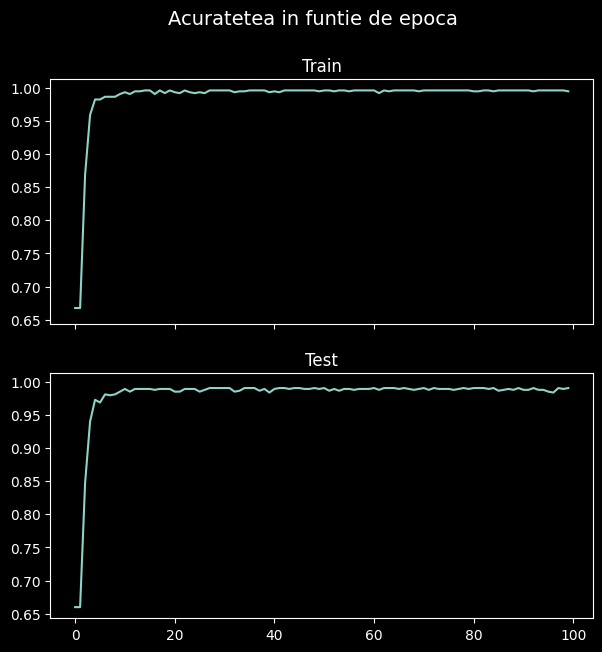

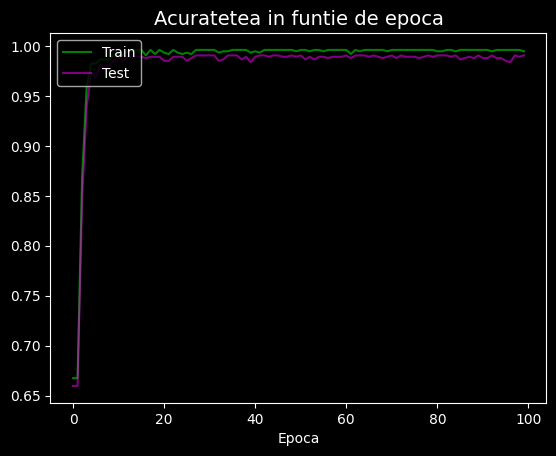

In [16]:
fig, ax = plt.subplots(2, sharex=True, sharey=True)

fig.set_figwidth(7);
fig.set_figheight(7);

ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Acuratetea in funtie de epoca", fontsize=14)

plt.show()

plt.plot(scores_train, color='green', alpha=1, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.5, label='Test')
plt.title("Acuratetea in funtie de epoca", fontsize=14)
plt.xlabel('Epoca')
plt.legend(loc='upper left')
plt.show()

*   **Obs 1**: Un numar mare de epoci duce la overfitting
*   **Obs 2**: Numarul de neuroni din hidden layers trebuie sa fie intre numnarul de inputuri si numarul de outputuri. Eu l-am pus la 3.
